<a href="https://colab.research.google.com/github/JuhiRaj/3DSimulations/blob/main/Evaluation_NewComplexLesions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIMULATIONS OF ASYMMETRIC PSF - TEST DATASETS

Mounted at /content/gdrive
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.0222


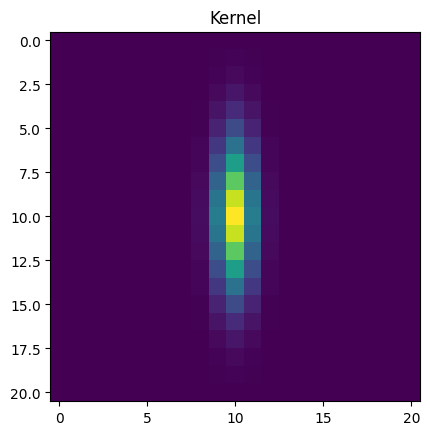

kernel sum: 1.0002844063347565
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.079


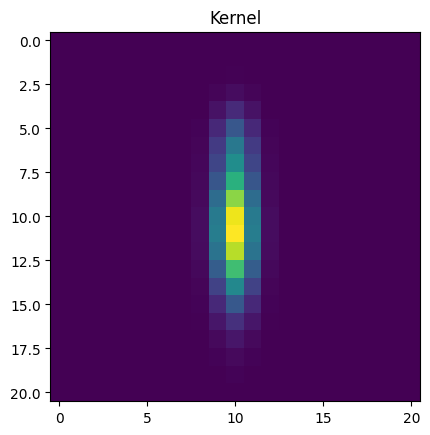

kernel sum: 1.00057195147628
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.2349


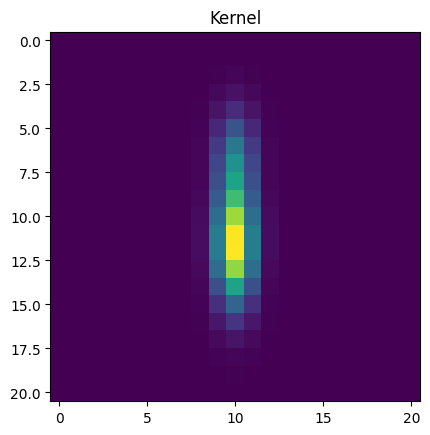

kernel sum: 1.000651132209016
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.4403


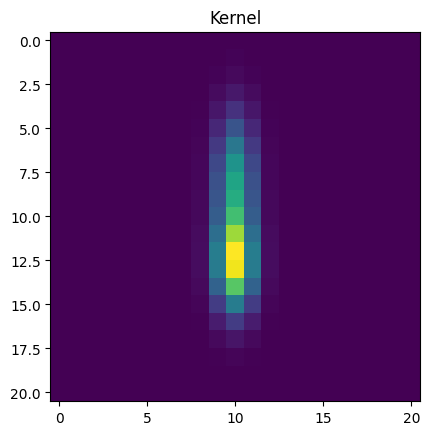

kernel sum: 1.0005920921204012
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.6594


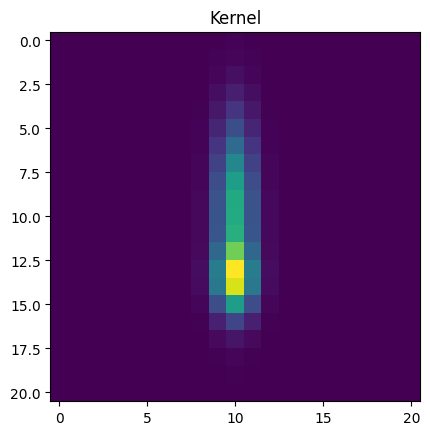

kernel sum: 0.9999265291500123
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.6731


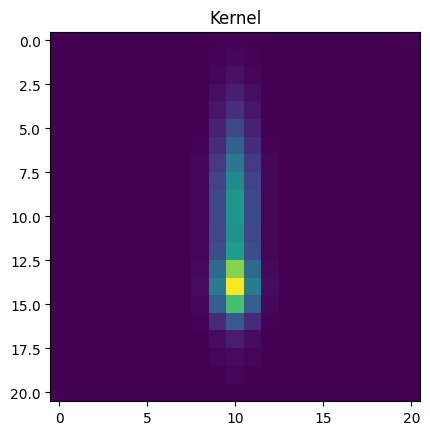

kernel sum: 0.9991611232772343
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.6694


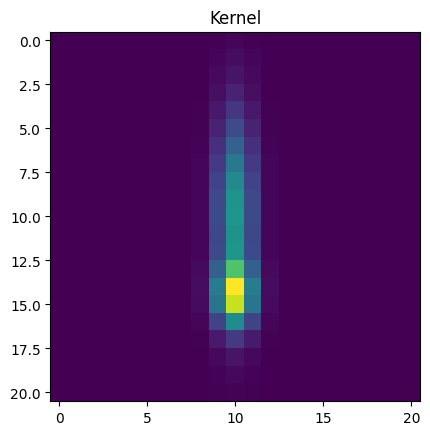

kernel sum: 0.9977804490003266
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.0222


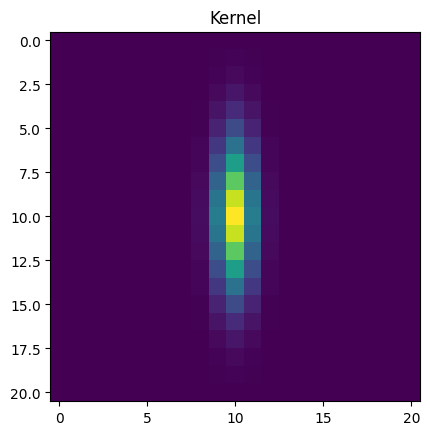

kernel sum: 1.0002844063347565
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.079


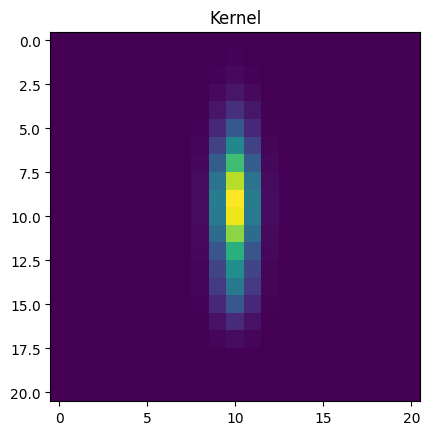

kernel sum: 1.00057195147628
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.2349


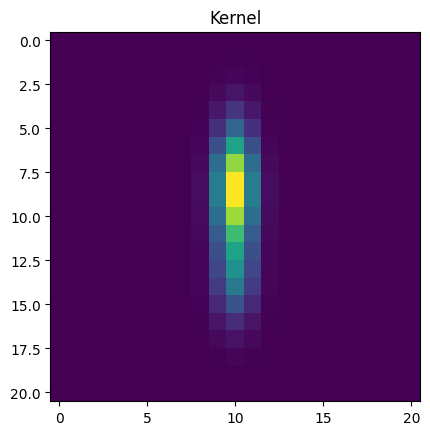

kernel sum: 1.0006511322090157
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.4403


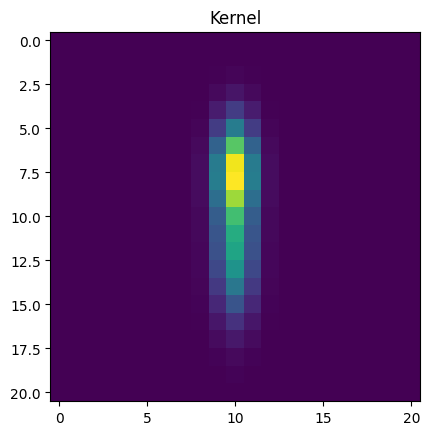

kernel sum: 1.0005920921204012
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.6594


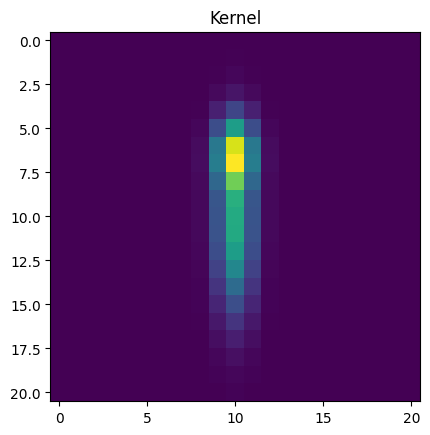

kernel sum: 0.9999265291500123
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.6731


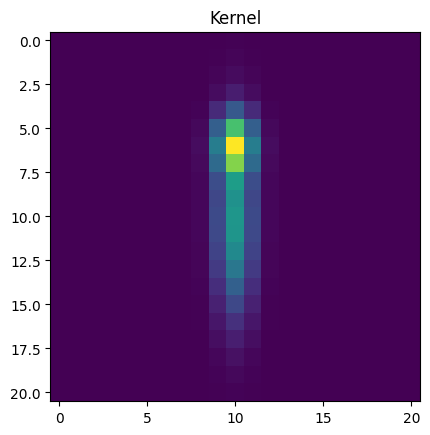

kernel sum: 0.9991611232772343
probs1: 21
probs2: 21
probs3: 21
type(probs1).  <class 'list'>
probs4: 21
probs5: 21
probs6: 21
Ratio: 0.6694


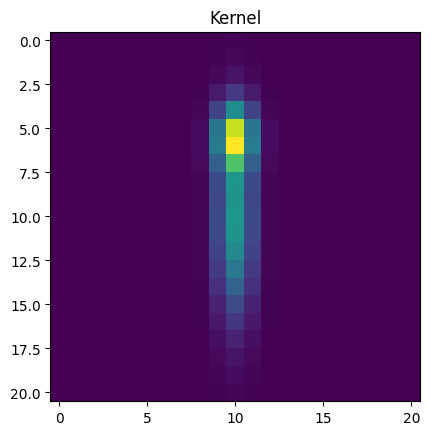

kernel sum: 0.9977804490003267


In [ ]:
import os
import random
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gc
import math
import cv2
from scipy import integrate
import shutil
from google.colab import drive
drive.mount('/content/gdrive')
from numpy import pi, exp, sqrt
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
from skimage.measure import profile_line
from skimage.io import imread

#kernel_path = "/content/gdrive/MyDrive/3DKernels/"

#if not os.path.exists(kernel_path):
#    os.makedirs(kernel_path)
#else:
#    shutil.rmtree(kernel_path)
#    os.makedirs(kernel_path)



list_sigma1 = [2.05, 2.79, 4.27, 5.68, 7.48, 8.07, 8.67] #Sigma 1 List
list_shift_1 = [0., -4.35, -3.28, -2.03, -0.67, -0.41, -0.28] #Shift 1 List

list_sigma2 = [7.03, 6.29, 5.31, 4.28, 3.06, 2.68, 2.84] #Sigma 2 List
list_shift_2 = [0., 0.69, 1.62, 2.69, 3.61, 4.08, 4.49] #Shift 2 List

ratio = [0.0222, 0.079, 0.2349, 0.4403, 0.6594, 0.6731, 0.6694] #Ratio

list_kernels1 = []
list_kernels2 = []

for i in range(7):
  tof1, shift1, lor1, lorz_1, k1 = list_sigma1[i]/2.355, list_shift_1[i], 1.5/2.355, 1.8/2.355, 10
  tof2, shift2, lor2, lorz_2, k2 = list_sigma2[i]/2.355, list_shift_2[i], 1.5/2.355, 1.8/2.355, 10
  probs1 = [exp((-((y-shift1)**2))/(2*tof1*tof1))/sqrt(2*pi*tof1*tof1) for y in range(-k1,k1+1)]
  probs2 = [exp(-x*x/(2*lor1*lor1))/sqrt(2*pi*lor1*lor1) for x in range(-k1,k1+1)]
  probs3 = [exp(-z*z/(2*lorz_1*lorz_1))/sqrt(2*pi*lorz_1*lorz_1) for z in range(-k1,k1+1)]

  print("probs1:",np.size(probs1))
  print("probs2:",np.size(probs2))
  print("probs3:",np.size(probs3))
  print('type(probs1). ',type(probs1))
  len_ = np.size(probs1)
  kernel1 = np.zeros((len_,len_,len_))

  for m in range(len_):
    for n in range(len_):
      for o in range(len_):
        kernel1[m,n,o] = probs1[n]*probs2[m]*probs3[o]

  probs4 = [exp((-((y-shift2)**2))/(2*tof2*tof2))/sqrt(2*pi*tof2*tof2) for y in range(-k2,k2+1)]
  probs5 = [exp(-x*x/(2*lor2*lor2))/sqrt(2*pi*lor2*lor2) for x in range(-k2,k2+1)]
  probs6 = [exp(-z*z/(2*lorz_2*lorz_2))/sqrt(2*pi*lorz_2*lorz_2) for z in range(-k2,k2+1)]

  print("probs4:",np.size(probs4))
  print("probs5:",np.size(probs5))
  print("probs6:",np.size(probs6))
  kernel2 = np.zeros((len_,len_,len_))

  for m in range(len_):
    for n in range(len_):
      for o in range(len_):
        kernel2[m,n,o] = probs4[n]*probs5[m]*probs6[o]

  print("Ratio:", ratio[i])
  kernel_first = (ratio[i]*kernel1) +  ((1-ratio[i])*kernel2)

  plt.imshow(np.sum(kernel_first,axis=0))
  plt.title('Kernel')
  plt.show()

  print("kernel sum:",np.sum(kernel_first))

  flat_ker1 = kernel_first.flatten()
  list_kernels1.append(flat_ker1)





for i in range(7):
  tof1, shift1, lor1, lorz_1, k1 = list_sigma1[i]/2.355, list_shift_1[i], 1.5/2.355, 1.8/2.355, 10
  tof2, shift2, lor2, lorz_2, k2 = list_sigma2[i]/2.355, list_shift_2[i], 1.5/2.355, 1.8/2.355, 10
  probs1 = [exp((-((y+shift1)**2))/(2*tof1*tof1))/sqrt(2*pi*tof1*tof1) for y in range(-k1,k1+1)]
  probs2 = [exp(-x*x/(2*lor1*lor1))/sqrt(2*pi*lor1*lor1) for x in range(-k1,k1+1)]
  probs3 = [exp(-z*z/(2*lorz_1*lorz_1))/sqrt(2*pi*lorz_1*lorz_1) for z in range(-k1,k1+1)]

  print("probs1:",np.size(probs1))
  print("probs2:",np.size(probs2))
  print("probs3:",np.size(probs3))
  print('type(probs1). ',type(probs1))
  len_ = np.size(probs1)
  kernel1 = np.zeros((len_,len_,len_))

  for m in range(len_):
    for n in range(len_):
      for o in range(len_):
        kernel1[m,n,o] = probs1[n]*probs2[m]*probs3[o]

  probs4 = [exp((-((y+shift2)**2))/(2*tof2*tof2))/sqrt(2*pi*tof2*tof2) for y in range(-k2,k2+1)]
  probs5 = [exp(-x*x/(2*lor2*lor2))/sqrt(2*pi*lor2*lor2) for x in range(-k2,k2+1)]
  probs6 = [exp(-z*z/(2*lorz_2*lorz_2))/sqrt(2*pi*lorz_2*lorz_2) for z in range(-k2,k2+1)]

  print("probs4:",np.size(probs4))
  print("probs5:",np.size(probs5))
  print("probs6:",np.size(probs6))
  kernel2 = np.zeros((len_,len_,len_))

  for m in range(len_):
    for n in range(len_):
      for o in range(len_):
        kernel2[m,n,o] = probs4[n]*probs5[m]*probs6[o]

  print("Ratio:", ratio[i])
  kernel_second = (ratio[i]*kernel1) +  ((1-ratio[i])*kernel2)

  plt.imshow(np.sum(kernel_second, axis=0))
  plt.title('Kernel')
  plt.show()



  print("kernel sum:",np.sum(kernel_second))
  flat_ker2 = kernel_second.flatten()
  list_kernels2.append(flat_ker2)


CREATING DATASETS

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


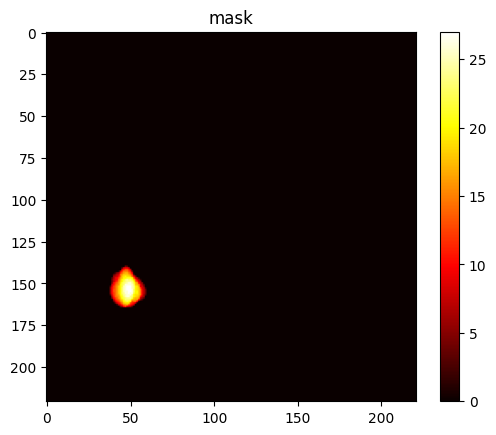

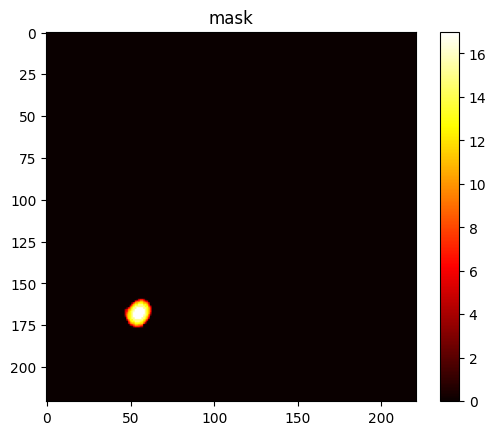

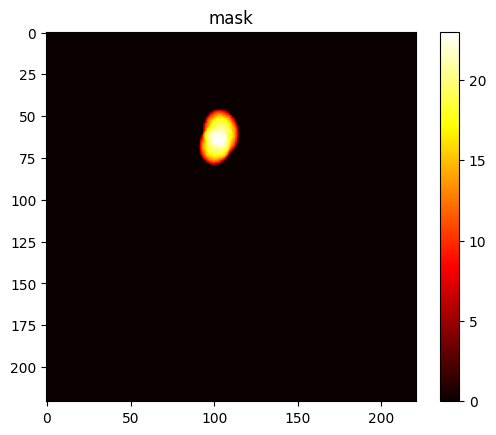

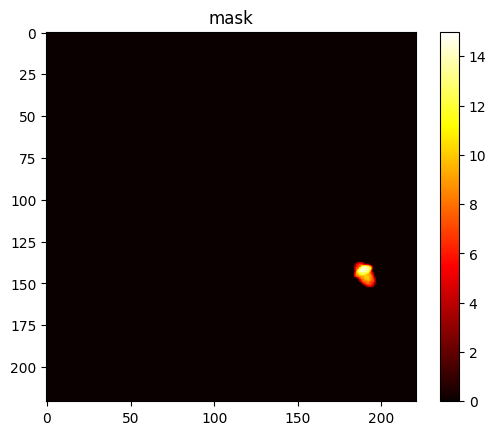

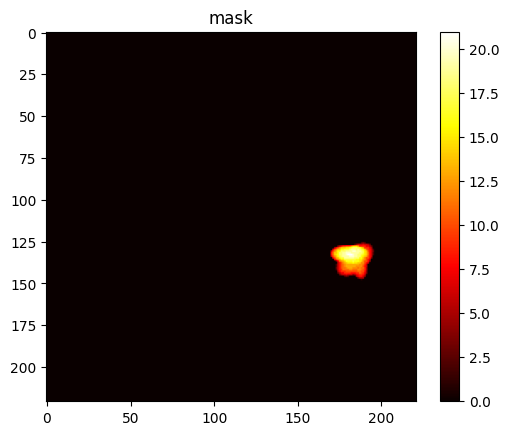

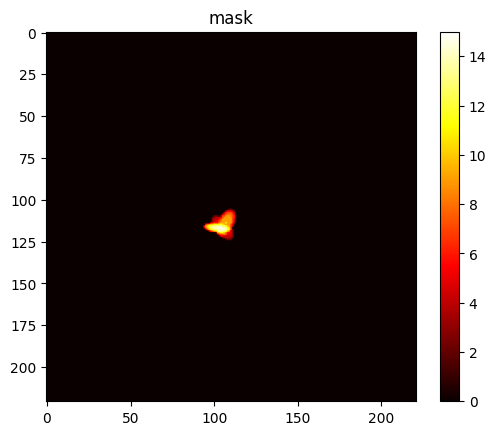

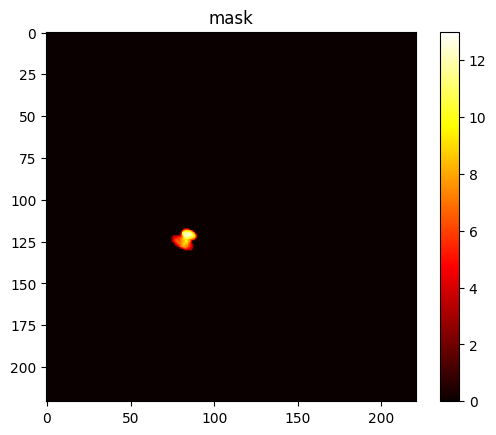

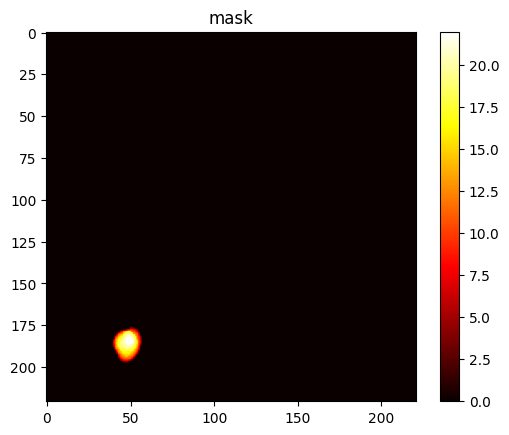

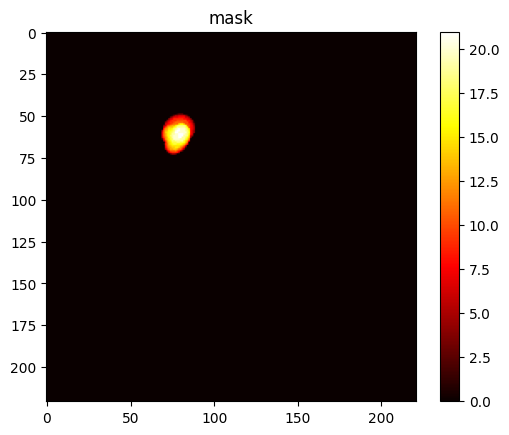

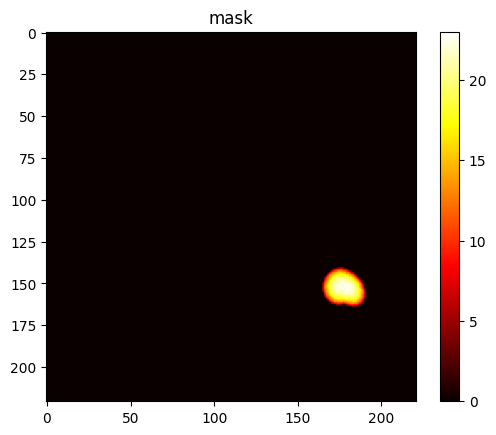

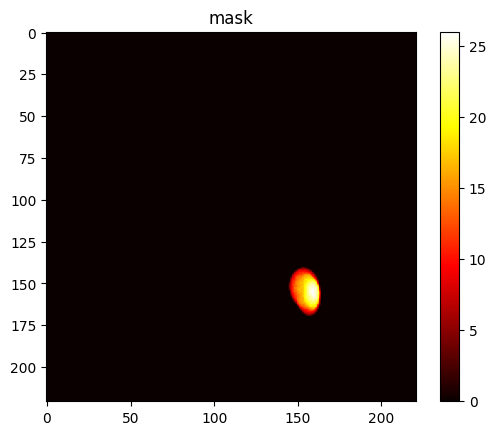

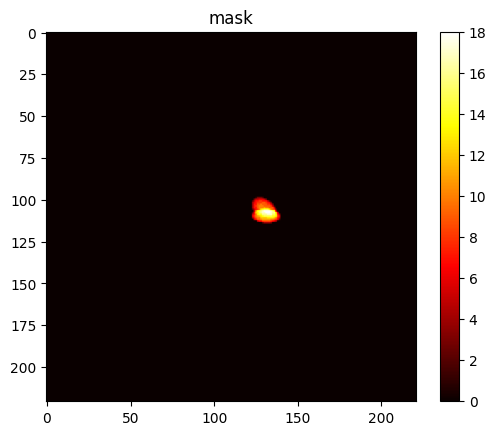

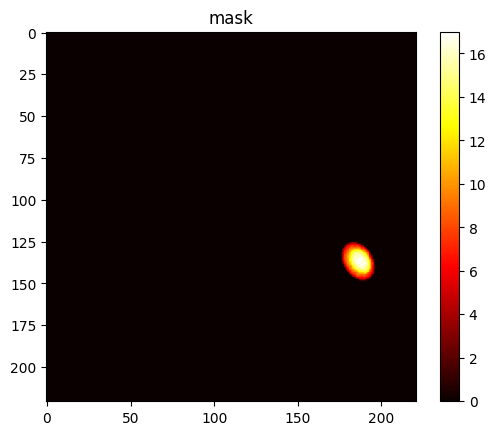

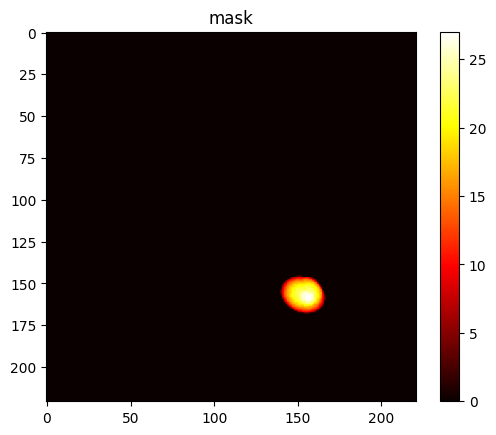

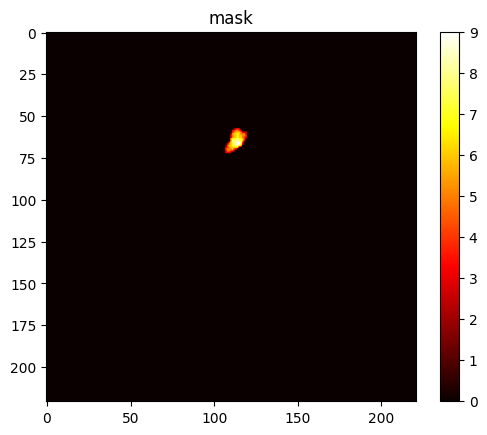

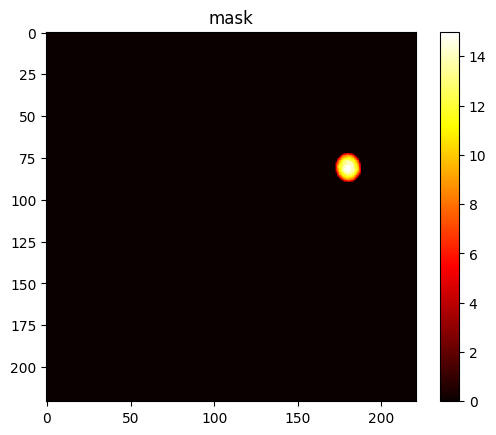

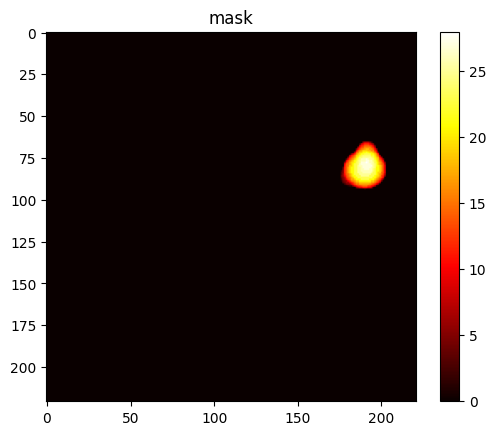

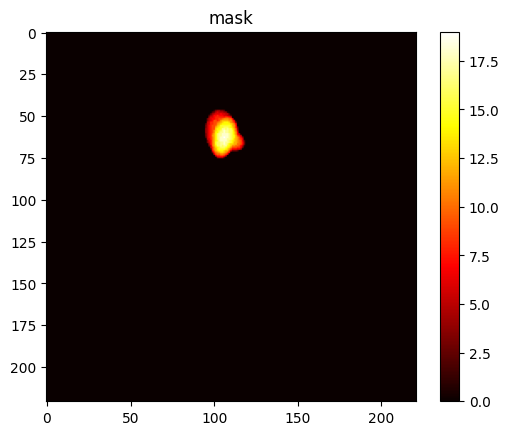

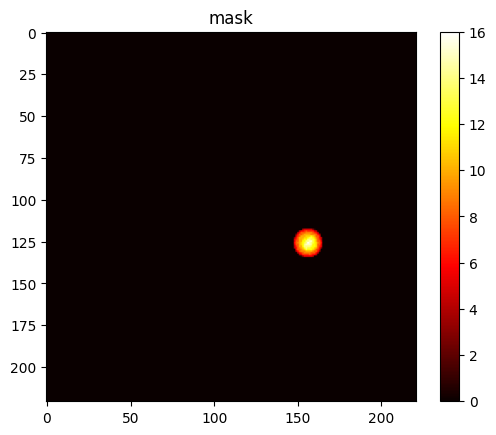

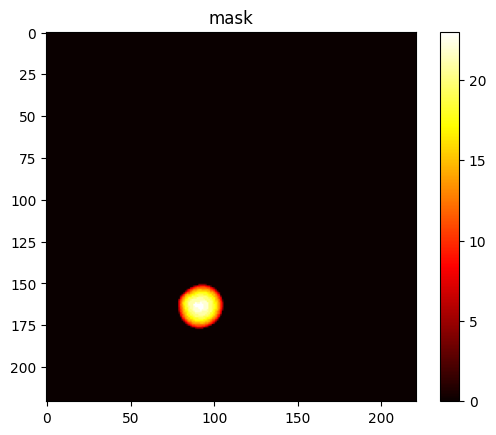

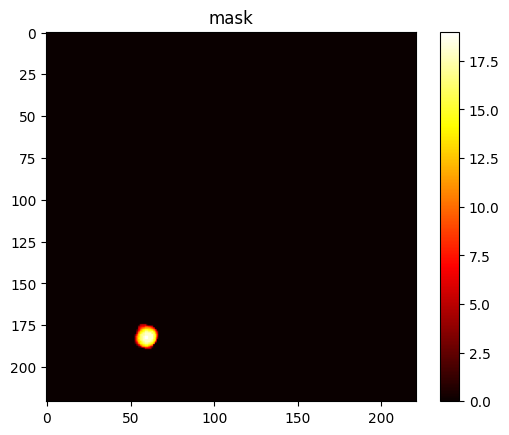

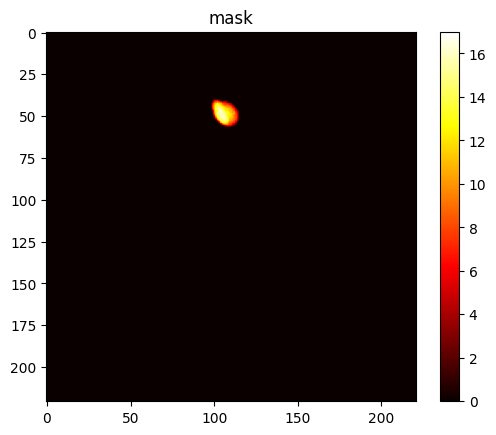

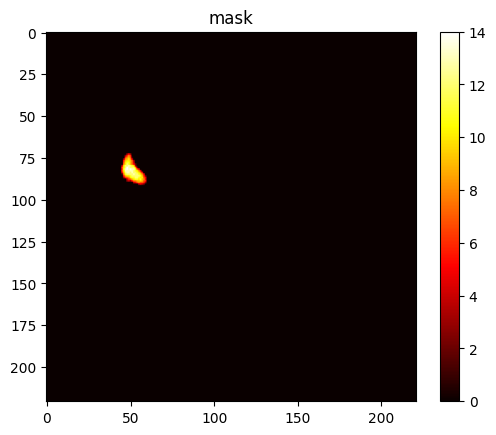

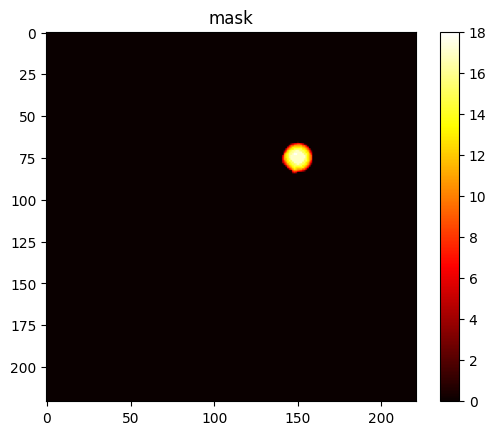

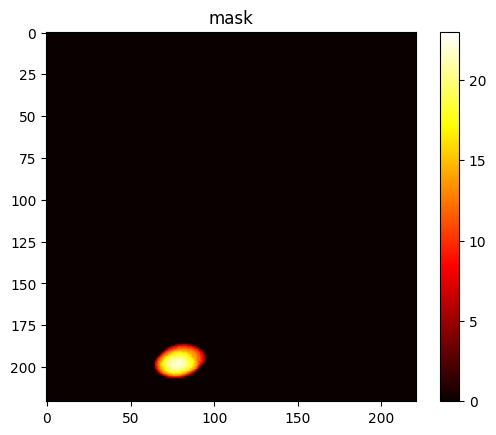

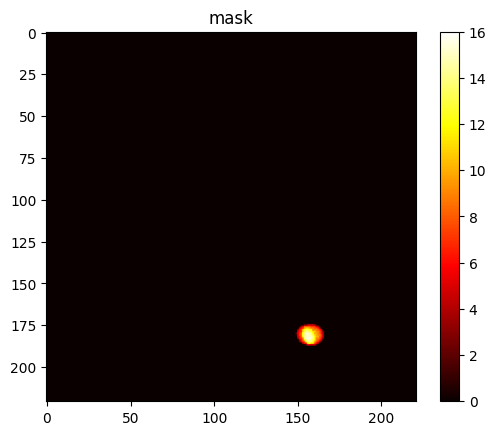

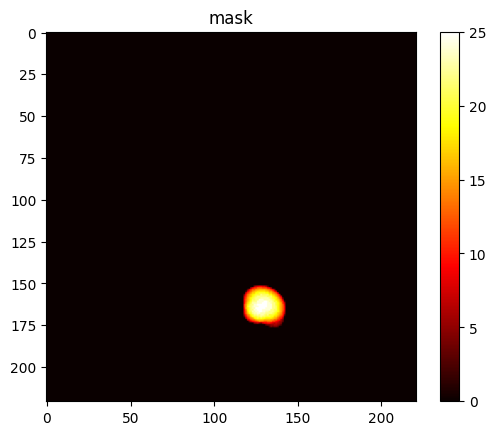

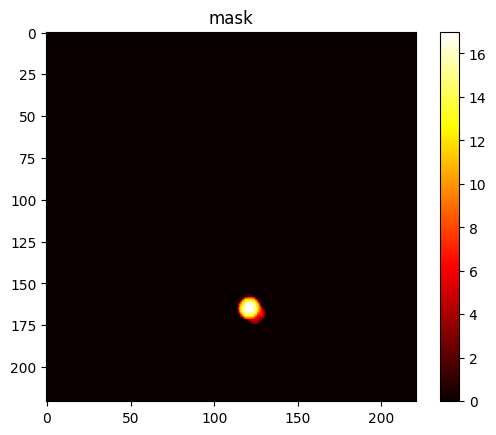

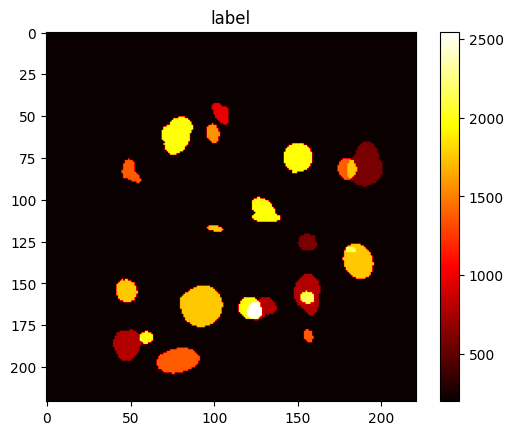

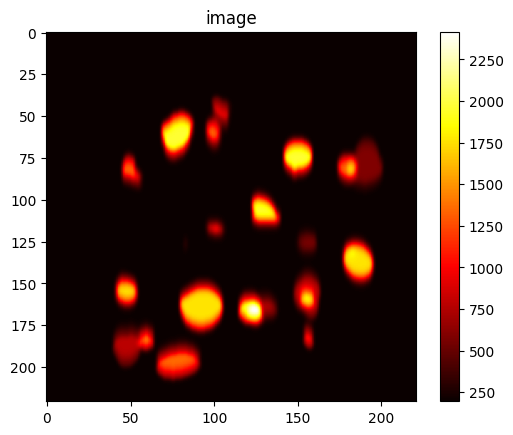

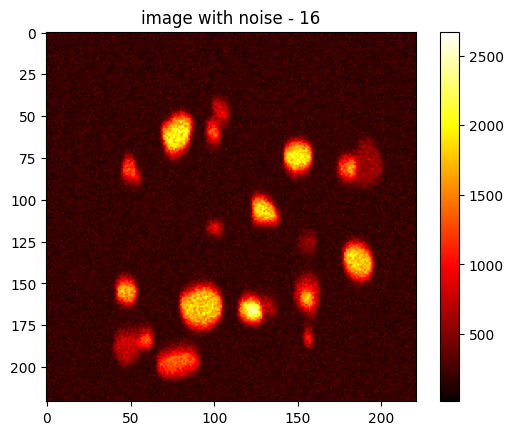

In [ ]:
from zmq import XPUB
from tifffile.tifffile import astype
from numpy.lib.npyio import NpzFile
from re import A
from numpy.core.memmap import dtype
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import save_image
from scipy import signal
import torch
import torch.nn as nn
from PIL import Image
import gc
import math
import cv2
import random
from scipy import integrate
import shutil
from matplotlib import cm
from google.colab import drive
drive.mount('/content/gdrive')
from numpy.random import default_rng
import math as m

def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])

def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])



np.set_printoptions(threshold=np.inf)

path = "/content/gdrive/MyDrive/NewComplex_Test/"

if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)
    os.makedirs(path)
os.mkdir(path + 'label/')
os.mkdir(path + 'image/')
os.mkdir(path + 'image_noise/')
os.mkdir(path + 'mask/')

randl = np.random.randint(10, 40)

path_label = "/content/gdrive/MyDrive/NewComplex_Test/label/"
path_image = "/content/gdrive/MyDrive/NewComplex_Test/image/"
path_image_noise = "/content/gdrive/MyDrive/NewComplex_Test/image_noise/"
path_mask = "/content/gdrive/MyDrive/NewComplex_Test/mask/"


for n in range(0, 1, 1):
  bcg_level = np.random.randint(100, 200)
  label = np.ones(shape = (101,221,221))
  image = np.ones(shape = (101,221,221))
  label = label * bcg_level
  image = image * bcg_level
  for r in range(randl):
    contrast = np.random.randint(2, 10)
    BODY = np.zeros(shape = (101,221,221))
    mask = np.zeros(shape = (101,221,221))
    BODY_smear = 0
    binary = np.random.randint(0, 2)
    if(binary<1):
      A1 = np.random.randint(3, 10)
      B1 = np.random.randint(3, 10)
      C1 = np.random.randint(3, 10)
      A2 = np.random.randint(3, 10)
      B2 = np.random.randint(3, 10)
      C2 = np.random.randint(3, 10)
      A3 = np.random.randint(3, 10)
      B3 = np.random.randint(3, 10)
      C3 = np.random.randint(3, 10)
      s2x = np.random.randint(-3, 3)
      s2y = np.random.randint(-3, 3)
      s2z = np.random.randint(-3, 3)
      s3x = np.random.randint(-3, 3)
      s3y = np.random.randint(-3, 3)
      s3z = np.random.randint(-3, 3)
    else:
      A1 = np.random.randint(5, 15)
      B1 = np.random.randint(5, 15)
      C1 = np.random.randint(5, 15)
      A2 = np.random.randint(5, 15)
      B2 = np.random.randint(5, 15)
      C2 = np.random.randint(5, 15)
      A3 = np.random.randint(5, 15)
      B3 = np.random.randint(5, 15)
      C3 = np.random.randint(5, 15)
      s2x = np.random.randint(-4, 4)
      s2y = np.random.randint(-4, 4)
      s2z = np.random.randint(-4, 4)
      s3x = np.random.randint(-4, 4)
      s3y = np.random.randint(-4, 4)
      s3z = np.random.randint(-4, 4)


    Maj1 = np.max([A1, B1, C1, A2, B2, C2, A3, B3, C3])
    #Maj2 = np.max([A2, B2, C2])
    #Maj3 = np.max([A3, B3, C3])

    randx = np.random.randint(35, 55) #X0
    randy = np.random.randint(35, 185)  #Y0
    randz = np.random.randint(35, 185)  #Z0

    theta1 = np.random.uniform(0, 3.14)
    phi1 = np.random.uniform(0, 3.14)
    eta1 = np.random.uniform(0, 3.14)
    theta2 = np.random.uniform(0, 3.14)
    phi2 = np.random.uniform(0, 3.14)
    eta2 = np.random.uniform(0, 3.14)
    theta3 = np.random.uniform(0, 3.14)
    phi3 = np.random.uniform(0, 3.14)
    eta3 = np.random.uniform(0, 3.14)


    R1 = Rx(theta1).dot(Ry(phi1)).dot(Rz(eta1))
    #print(R1)
    R2 = Rx(theta2).dot(Ry(phi2)).dot(Rz(eta2))
    #print(R2)
    R3 = Rx(theta3).dot(Ry(phi3)).dot(Rz(eta3))
    #print(R2)


    check_1 = lambda x,y,z: True if (x**2/A1**2+y**2/B1**2+z**2/C1**2) < 1 else False
    check_2 = lambda x,y,z: True if (x**2/A2**2+y**2/B2**2+z**2/C2**2) < 1 else False
    check_3 = lambda x,y,z: True if (x**2/A3**2+y**2/B3**2+z**2/C3**2) < 1 else False

    for i in range(2*Maj1):
      for j in range(2*Maj1):
        for k in range(2*Maj1):
          x = - Maj1 + i
          y = - Maj1 + j
          z = - Maj1 + k
          btv = R1.dot(np.array([x,y,z]))
          xp,yp,zp = np.array(btv)[0]
          if check_1(xp,yp,zp): BODY[randx + i, randy + j, randz + k] = 1
          #print(i,j,k, check_(xp,yp,zp))

    for i in range(2*(Maj1+3)):
      for j in range(2*Maj1):
        for k in range(2*Maj1):
          x = - Maj1 + i
          y = - Maj1 + j
          z = - Maj1 + k
          btv = R2.dot(np.array([x,y,z]))
          xp,yp,zp = np.array(btv)[0]
          if check_2(xp,yp,zp): BODY[randx + s2x + i, randy + s2y + j, randz + s2z + k] = 1
          #print(i,j,k, check_(xp,yp,zp))

    for i in range(2*(Maj1+3)):
      for j in range(2*Maj1):
        for k in range(2*Maj1):
          x = - Maj1 + i
          y = - Maj1 + j
          z = - Maj1 + k
          btv = R3.dot(np.array([x,y,z]))
          xp,yp,zp = np.array(btv)[0]
          if check_3(xp,yp,zp): BODY[randx + s3x+ i, randy + s3y + j, randz + s3z + k] = 1
          #print(i,j,k, check_(xp,yp,zp))
    mask = BODY
    for i in range(101):
      for j in range(221):
        for k in range(221):
          if mask[i,j,k] > 0:
            mask[i,j,k] = 1
    mask.astype(np.float32).tofile(path_mask+str(n)+str(r)+'.i')
    plt.imshow(np.sum(mask,axis=0), cmap='hot')
    plt.colorbar()
    plt.title("mask")
    plt.show()

    BODY = contrast*bcg_level*BODY

    if randy in range(205, 221):
      kernel_toconv = np.reshape(list_kernels1[6], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(189, 205):
      kernel_toconv = np.reshape(list_kernels1[5], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(173, 189):
      kernel_toconv = np.reshape(list_kernels1[4], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(158, 173):
      kernel_toconv = np.reshape(list_kernels1[3], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(142, 158):
      kernel_toconv = np.reshape(list_kernels1[2], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(126, 142):
      kernel_toconv = np.reshape(list_kernels1[1], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(110, 126):
      kernel_toconv = np.reshape(list_kernels1[0], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')

    elif randy in range(94, 110):
      kernel_toconv = np.reshape(list_kernels2[0], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(78, 94):
      kernel_toconv = np.reshape(list_kernels2[1], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(62, 78):
      kernel_toconv = np.reshape(list_kernels2[2], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(46, 62):
      kernel_toconv = np.reshape(list_kernels2[3], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(30, 46):
      kernel_toconv = np.reshape(list_kernels2[4], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(14, 30):
      kernel_toconv = np.reshape(list_kernels2[5], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')
    elif randy in range(0, 14):
      kernel_toconv = np.reshape(list_kernels2[6], (21,21,21), order='C')
      BODY_smear = signal.fftconvolve(BODY, kernel_toconv, mode = 'same')

    label = label + BODY
    image = image + BODY_smear
  label.astype(np.float32).tofile(path_label+str(n)+'.i')
  plt.imshow(label[50,:,:], cmap='hot')
  plt.colorbar()
  plt.title("label")
  plt.show()

  image.astype(np.float32).tofile(path_image+str(n)+'.i')
  plt.imshow(image[50,:,:], cmap='hot')
  plt.colorbar()
  plt.title("image")
  plt.show()

  image_16 = image/16
  image_noise = np.random.poisson(image_16)
  image_noise = 16*image_noise
  image_noise.astype(np.float32).tofile(path_image_noise+str(n)+'.i')
  plt.imshow(image_noise[50,:,:], cmap='hot')
  plt.colorbar()
  plt.title("image with noise - 16")
  plt.show()


LOADING THE MODEL

In [1]:
import torch
print(torch.cuda.is_available())

True


In [2]:
from IPython.core.display import Image
import torch
import torch.nn as nn
from torchsummary import summary


def double_conv(in_c, out_c):
  conv = nn.Sequential(
      nn.Conv3d(in_c, out_c, kernel_size=3, padding="same"),
      nn.ReLU(inplace=True),
      nn.Conv3d(out_c, out_c, kernel_size=3, padding="same"),
      nn.ReLU(inplace=True),
  )
  return conv

def double_conv_up(in_c, out_c):
  conv = nn.Sequential(
      nn.Conv3d(in_c, out_c, kernel_size=3, padding="same"),
      nn.ReLU(inplace=True),
      nn.Conv3d(out_c, out_c, kernel_size=3, padding="same"),
      nn.ReLU(inplace=True),
  )
  return conv


def crop_img(tensor, target_tensor):
  target_size = target_tensor.size()[2]
  if tensor.size()[2] % 2 == 1:
    tensor_size = tensor.size()[2]-1
  else:
    tensor_size = tensor.size()[2]
  delta = tensor_size - target_size
  delta = delta // 2
  return tensor[:, :, delta:tensor_size-delta, delta:tensor_size-delta]




class UNet(nn.Module):
  def __init__(self):
    super(UNet, self).__init__()
    self.max_pool_2x2 = nn.MaxPool3d(kernel_size=2, stride=2)
    self.down_conv_1 = double_conv(1,64) #Start with lesser # filters -  maybe 32
    self.down_conv_2 = double_conv(64,128)  #Reduce the depth of the UNet - and validate to see improvement
    self.down_conv_3 = double_conv(128,256)

    self.up_trans_3 = nn.ConvTranspose3d(in_channels=256,
                                         out_channels=128,
                                         kernel_size=2,
                                         stride=2)

    self.up_conv_3 = double_conv_up(256, 128)


    self.up_trans_2 = nn.ConvTranspose3d(in_channels=128,
                                         out_channels=64,
                                         kernel_size=2,
                                         stride=2,
                                         output_padding=1)

    self.up_conv_2 = double_conv_up(128, 64)

    self.out = nn.Conv3d(
        in_channels=64,
        out_channels=1,
        kernel_size=1,
        stride=1
    )




#############Backup##################

  def forward(self, image):
    # bs, c, h, w
    #print('---Encoder---')
    mean_img = torch.mean(image)
    #print("image shape:",image.shape)
    x1 = self.down_conv_1(image/mean_img)
    #print("x1 shape:",x1.shape)
    x2 = self.max_pool_2x2(x1)
    #print("x2 shape:",x2.shape)

    x3 = self.down_conv_2(x2)
    #print("x3 shape:",x3.shape)
    x4 = self.max_pool_2x2(x3)
   # print("x4 shape:",x4.shape)

   #print('---Bottle Neck---')
    x5 = self.down_conv_3(x4)
   # print("x5 shape:",x5.shape)


    #print('---Decoder---')

    x16 = self.up_trans_3(x5)
    #print('x16 shape:',x16.shape)
    c3_cat = torch.cat([x16, x3], 1)
    #print('c3_cat shape:',c3_cat.shape)
    x17 = self.up_conv_3(c3_cat)
    #print('x17 shape:',x17.shape)

    x18 = self.up_trans_2(x17)
    #print('x18 shape:',x18.shape)
    c2_cat = torch.cat([x18, x1], 1)
    #print('c2_cat shape:',c2_cat.shape)
    x19 = self.up_conv_2(c2_cat)
    #print('x19 shape:',x19.shape)
    x20 = self.out(x19)*mean_img
    #print('x20 shape:',x20.shape)
    return x20 + image #(Remove the Skip Connection here)


if __name__ == "__main__":
  image = torch.rand((1,1,101,221,221))
  model = UNet()
  print('1',model(image).shape)
  #print(model)


from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params+=params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

count_parameters(model)


1 torch.Size([1, 1, 101, 221, 221])
+----------------------+------------+
|       Modules        | Parameters |
+----------------------+------------+
| down_conv_1.0.weight |    1728    |
|  down_conv_1.0.bias  |     64     |
| down_conv_1.2.weight |   110592   |
|  down_conv_1.2.bias  |     64     |
| down_conv_2.0.weight |   221184   |
|  down_conv_2.0.bias  |    128     |
| down_conv_2.2.weight |   442368   |
|  down_conv_2.2.bias  |    128     |
| down_conv_3.0.weight |   884736   |
|  down_conv_3.0.bias  |    256     |
| down_conv_3.2.weight |  1769472   |
|  down_conv_3.2.bias  |    256     |
|  up_trans_3.weight   |   262144   |
|   up_trans_3.bias    |    128     |
|  up_conv_3.0.weight  |   884736   |
|   up_conv_3.0.bias   |    128     |
|  up_conv_3.2.weight  |   442368   |
|   up_conv_3.2.bias   |    128     |
|  up_trans_2.weight   |   65536    |
|   up_trans_2.bias    |     64     |
|  up_conv_2.0.weight  |   221184   |
|   up_conv_2.0.bias   |     64     |
|  up_conv_2.2

5418177

DATA LOADER

In [3]:
import glob
import os
import random
import cv2
import torch
from torch.utils.data import Dataset
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive/')



class Data_Loader(Dataset):
  def __init__(self, data_path):
        self.data_path = data_path
        self.imgs_path = glob.glob(os.path.join(data_path, 'image/*.i'))
        #print(self.imgs_path)
        self.imgs_path.sort()
        self.labs_path = glob.glob(os.path.join(data_path, 'label/*.i'))
        #print(self.labs_path)
        self.labs_path.sort()

  def __len__(self):
        return len(self.imgs_path)

  def __getitem__(self, index):
        image_path = self.imgs_path[index]
        label_path = self.labs_path[index]
        image = np.fromfile(image_path,dtype=np.float32)
        label = np.fromfile(label_path,dtype=np.float32)
        #print(image.shape)
        #print(label.shape)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
        image = image.reshape(1, 101, 221, 221)
        label = label.reshape(1, 101, 221, 221)
        #print(label.max())
        """if label.max() > 1:
            label = label / 255
        if image.max() > 1:
            image = image / 255"""
        return image, label



if __name__ == "__main__":
  train_dataset = Data_Loader("/content/gdrive/MyDrive/NewComplex_Test/")
  print("length：", len(train_dataset))
  train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=1,
                                               shuffle=True)
  print(len(train_loader))
  #for image, label in train_loader:
  #  print(image.shape)
  #  print(label.shape)


Mounted at /content/gdrive/
length： 1
1


In [4]:
import torch
print(torch.cuda.is_available())
torch.cuda.empty_cache()
device = 'cuda'
import torch, gc
import os
gc.collect()
torch.cuda.empty_cache()

#model.load_state_dict(torch.load('/content/gdrive/MyDrive/TRAIN_Phantom'))

#-------------------------TORCH TO NUMPY CONVERTORS-------------------------------------------
def torch_to_np(torch_array):   return np.squeeze(torch_array.detach().cpu().numpy())
def np_to_torch(np_array):      return torch.from_numpy(np_array).float()

True


WITHOUT **NOISE**

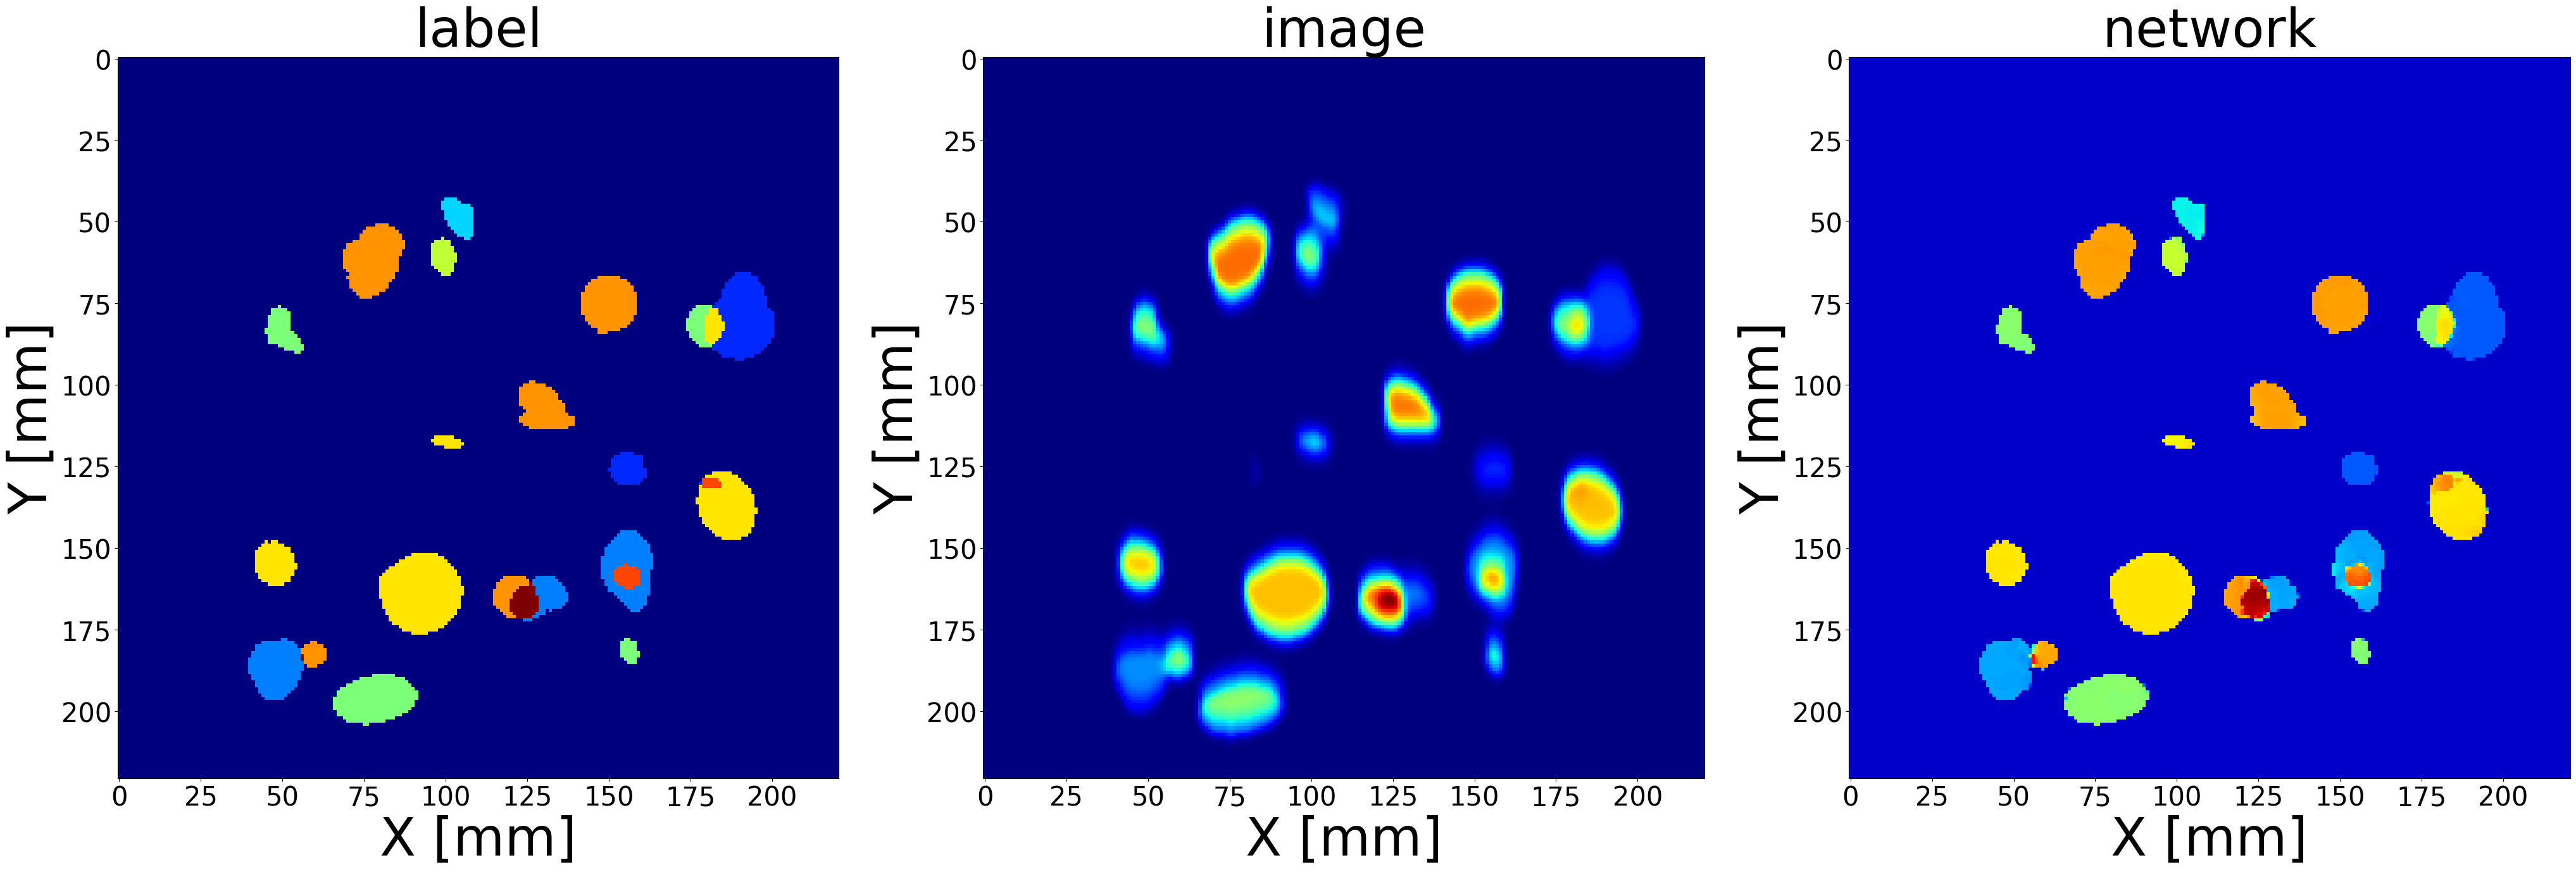

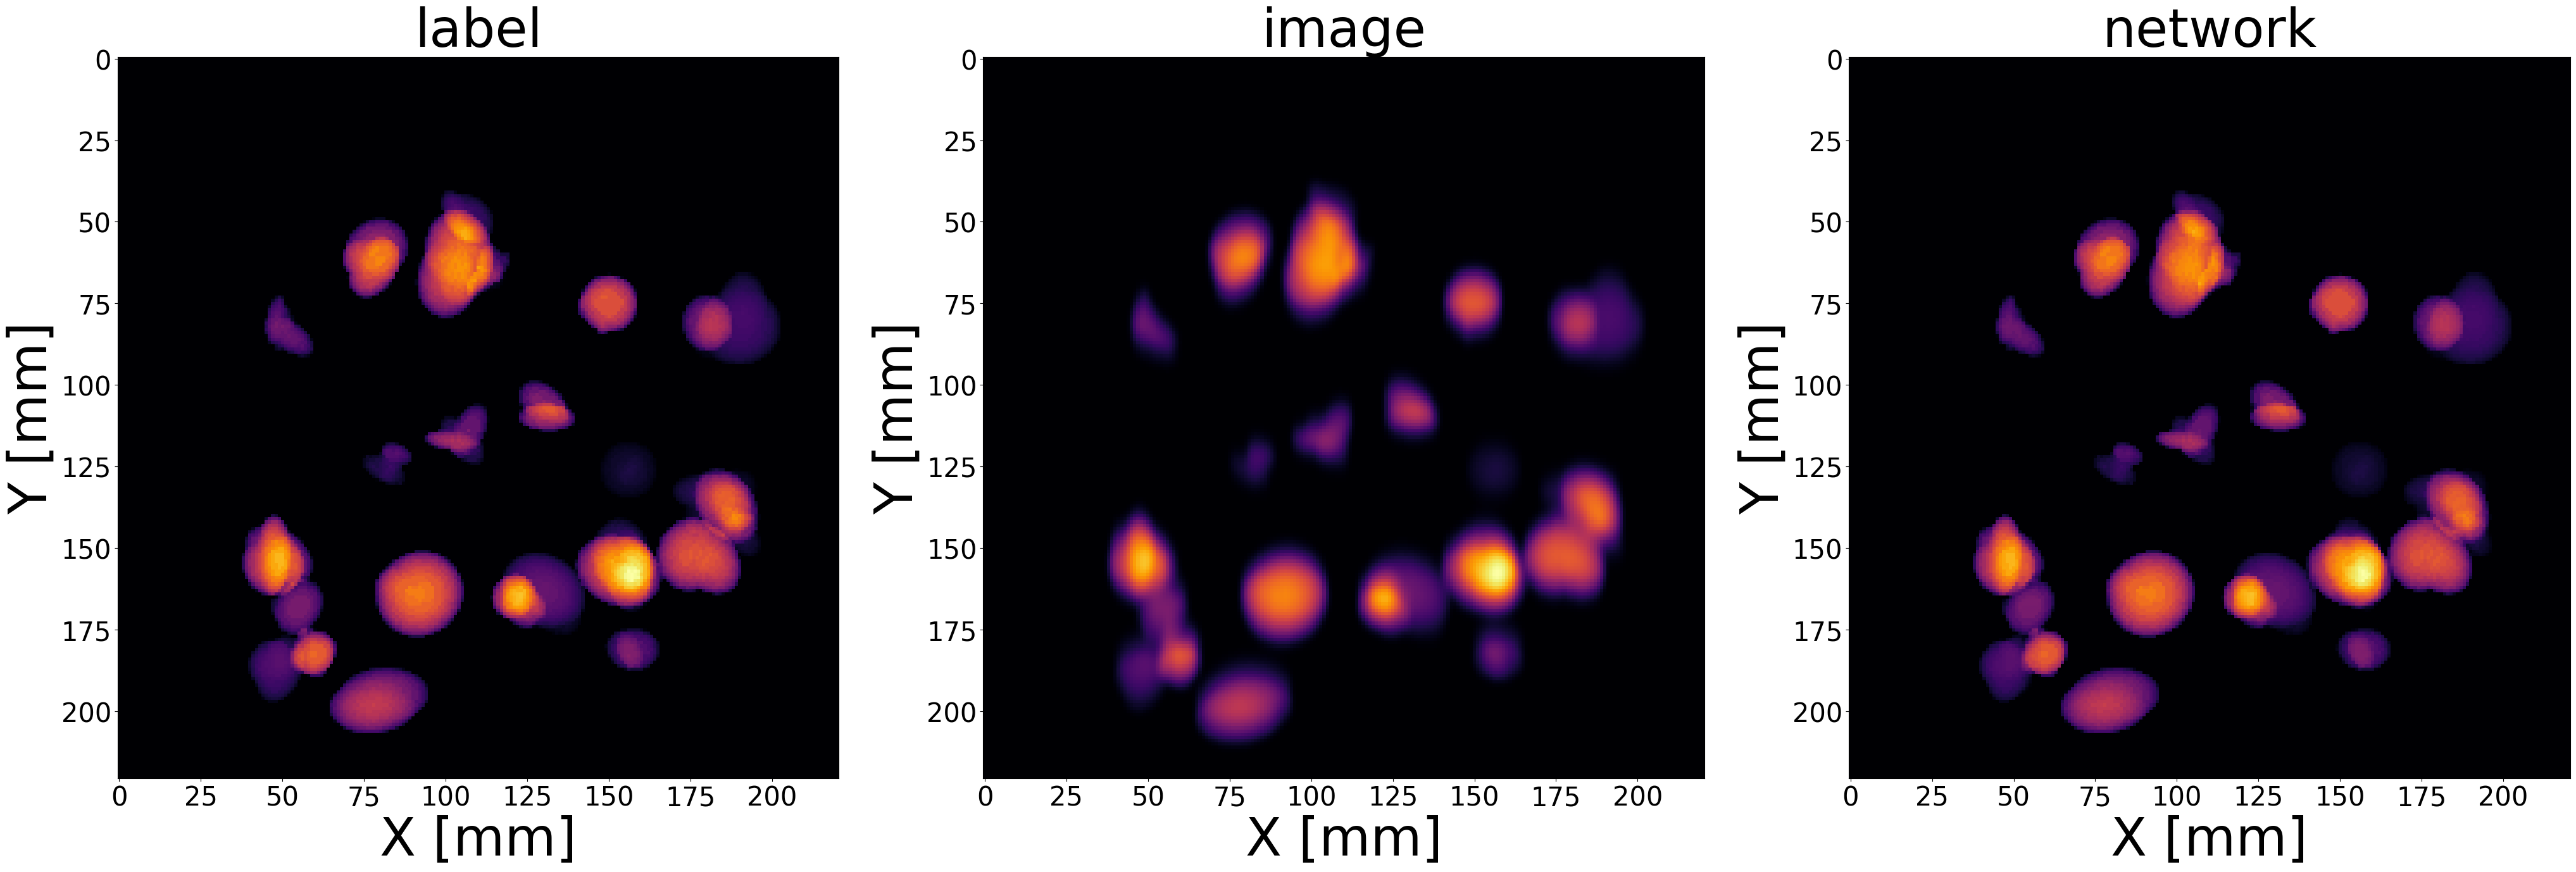

In [5]:
from matplotlib import pyplot as plt
from skimage.measure import profile_line
from skimage.io import imread
import shutil

import numpy as np
import matplotlib.pyplot as pltp
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

kernel_path = "/content/gdrive/MyDrive/NewComplex_Test/"

valid_dataset = Data_Loader("/content/gdrive/MyDrive/NewComplex_Test/")
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
                                               batch_size=1,
                                               shuffle=False)
model.load_state_dict(torch.load('/content/gdrive/MyDrive/EvalTest/Asymmetric_Complex_Train_HotBcg_file4995'))
model.eval()

label_for = np.fromfile("/content/gdrive/MyDrive/NewComplex_Test/label/0.i" ,dtype='float32')
label = np.reshape(label_for, (101, 221, 221))

image_for = np.fromfile("/content/gdrive/MyDrive/NewComplex_Test/image/0.i" ,dtype='float32')
image = np.reshape(image_for, (101, 221, 221))

image_tensor = np_to_torch(image)
image_tensor = image_tensor.reshape(1, 1, 101, 221, 221)
pred = model(image_tensor)

net_image_numpy = torch_to_np(pred)
net_image_numpy.astype(np.float32).tofile('/content/gdrive/MyDrive/NewComplex_Test/output/0.i')


fig, ax = plt.subplots(1, 3, figsize=(50, 20)) #Create the figures
ax[0].imshow(label[50,:,:], cmap='jet')
ax[0].set_title('label', fontsize=60)
ax[0].set_xlabel('X [mm]', fontsize=60)
ax[0].set_ylabel('Y [mm]', fontsize=60)
ax[0].xaxis.set_tick_params(labelsize=30)
ax[0].yaxis.set_tick_params(labelsize=30)

ax[1].imshow(image[50,:,:], cmap='jet')
ax[1].set_title('image', fontsize=60)
ax[1].set_xlabel('X [mm]', fontsize=60)
ax[1].set_ylabel('Y [mm]', fontsize=60)
ax[1].xaxis.set_tick_params(labelsize=30)
ax[1].yaxis.set_tick_params(labelsize=30)


ax[2].imshow(net_image_numpy[50,:,:], cmap='jet')
ax[2].set_title('network', fontsize=60)
ax[2].set_xlabel('X [mm]', fontsize=60)
ax[2].set_ylabel('Y [mm]', fontsize=60)
ax[2].xaxis.set_tick_params(labelsize=30)
ax[2].yaxis.set_tick_params(labelsize=30)


fig, ax = plt.subplots(1, 3, figsize=(50, 20)) #Create the figures
ax[0].imshow(np.sum(label,axis=0), cmap='inferno')
ax[0].set_title('label', fontsize=60)
ax[0].set_xlabel('X [mm]', fontsize=60)
ax[0].set_ylabel('Y [mm]', fontsize=60)
ax[0].xaxis.set_tick_params(labelsize=30)
ax[0].yaxis.set_tick_params(labelsize=30)

ax[1].imshow(np.sum(image,axis=0), cmap='inferno')
ax[1].set_title('image', fontsize=60)
ax[1].set_xlabel('X [mm]', fontsize=60)
ax[1].set_ylabel('Y [mm]', fontsize=60)
ax[1].xaxis.set_tick_params(labelsize=30)
ax[1].yaxis.set_tick_params(labelsize=30)

ax[2].imshow(np.sum(net_image_numpy,axis=0), cmap='inferno')
ax[2].set_title('network', fontsize=60)
ax[2].set_xlabel('X [mm]', fontsize=60)
ax[2].set_ylabel('Y [mm]', fontsize=60)
ax[2].xaxis.set_tick_params(labelsize=30)
ax[2].yaxis.set_tick_params(labelsize=30)


WITHOUT NOISE EVALUATION (MEAN LESION BIAS)

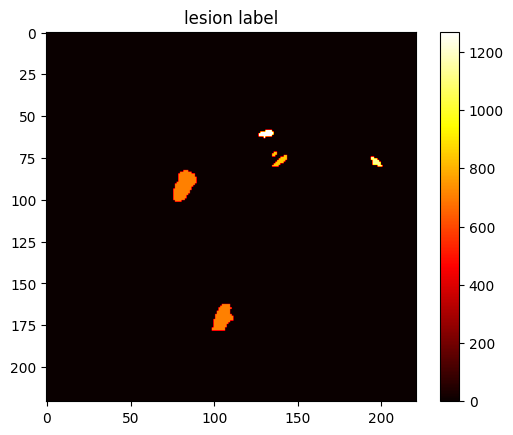

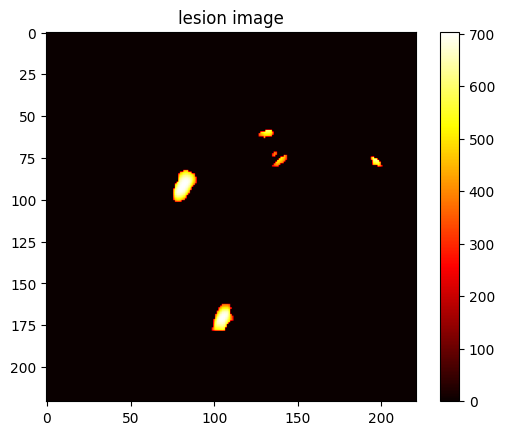

Voxels # 31260
Mean Lesion Bias (Label) 0.0
Mean Lesion Bias (Image) 187.1726796297255
Mean Lesion Bias (Network) 10.800962530857314
Mean Lesion (Label) 5.398909697075234
Mean Lesion (Image) 4.212798214042045
Mean Lesion (Network) 5.330464100682615
Std Lesion (Label) 71.08936610589485
Std Lesion (Image) 56.00430308263854
Std Lesion (Network) 70.35842295087477


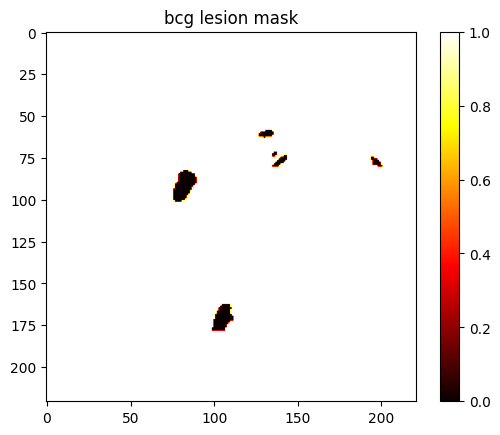

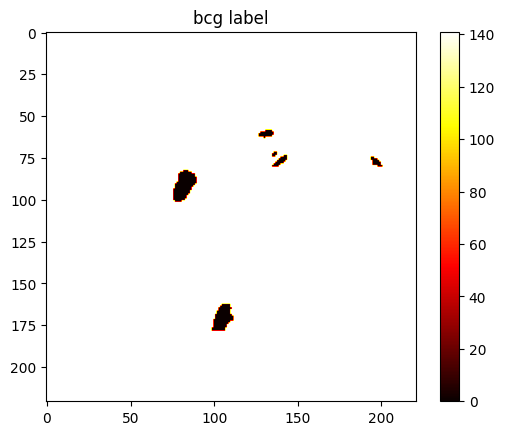

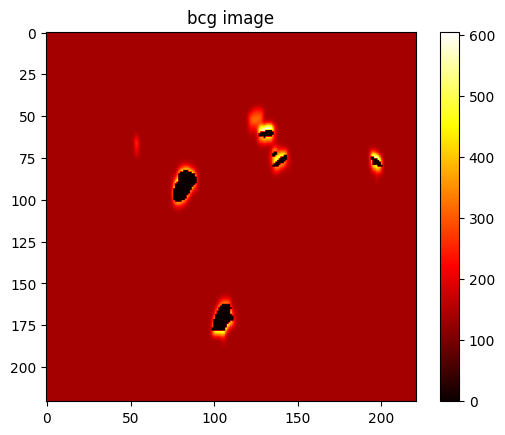

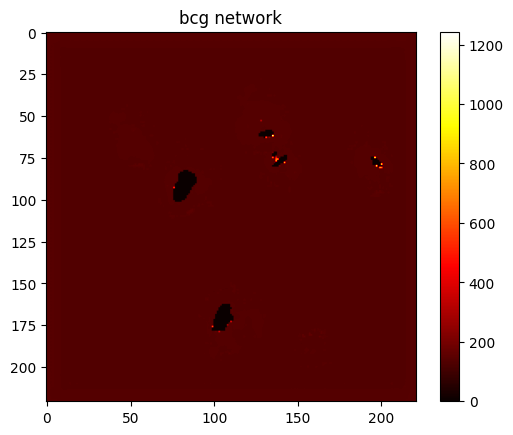

Mean Bcg (Label) 140.1064843467619
Mean Bcg (Image) 141.295194536174
Mean Bcg (Network) 135.76413867385136
Std Bcg (Label) 11.188714710992903
Std Bcg (Image) 20.520592396691633
Std Bcg (Network) 12.945374519561408
CRC(Label) 1.0
CRC(Image) 1.0090681876670748
CRC(Network) 0.9992424588011061
IR(Label) 0.07985865010573648
IR(Image) 0.14523206160021251
IR(Network) 0.09535194379025462


In [ ]:



lesion_label = np.zeros(shape = (101,221,221))
lesion_image = np.zeros(shape = (101,221,221))
lesion_image_noise = np.zeros(shape = (101,221,221))
lesion_network = np.zeros(shape = (101,221,221))

label = np.fromfile("/content/gdrive/MyDrive/EvalTest/label/0.i" ,dtype='float32')
image = np.fromfile("/content/gdrive/MyDrive/EvalTest/image/0.i" ,dtype='float32')
label_mask = np.fromfile("/content/gdrive/MyDrive/EvalTest/label_mask/0.i" ,dtype='float32')
network = np.fromfile("/content/gdrive/MyDrive/EvalTest/output/0.i" ,dtype='float32')

label = np.reshape(label, (101, 221, 221))
image = np.reshape(image, (101, 221, 221))
network = np.reshape(network, (101, 221, 221))
label_mask = np.reshape(label_mask, (101, 221, 221))


for i in range(101):
  for j in range(221):
    for k in range(221):
      lesion_label[i,j,k] = label[i,j,k]*label_mask[i,j,k]
      lesion_image[i,j,k] = image[i,j,k]*label_mask[i,j,k]
      lesion_network[i,j,k] = network[i,j,k]*label_mask[i,j,k]

plt.imshow(lesion_label[50,:,:], cmap='hot')
plt.colorbar()
plt.title("lesion label")
plt.show()
count = np.sum(lesion_label > 0)


plt.imshow(lesion_image[50,:,:], cmap='hot')
plt.colorbar()
plt.title("lesion image")
plt.show()



print("Voxels #",count)

### ------ NO NOISE -------  ###
#BIAS

bias_sum_label = 0.
for i in range(101):
  for j in range(221):
    for k in range(221):
      bias_label = lesion_label[i,j,k] - lesion_label[i,j,k]
      bias_sum_label = bias_sum_label + bias_label
bias_sum_mean_label = bias_sum_label/count

print("Mean Lesion Bias (Label)",bias_sum_mean_label) # Mean Voxel Bias


bias_sum_image = 0.
for i in range(101):
  for j in range(221):
    for k in range(221):
      bias_image = lesion_label[i,j,k] - lesion_image[i,j,k]  #(label-image/mean of label)*100
      bias_sum_image = bias_sum_image + bias_image #(label-image/mean of label)*100 #Error will be std
bias_sum_mean_image = bias_sum_image/count

print("Mean Lesion Bias (Image)",bias_sum_mean_image)

bias_sum_network = 0.
for i in range(101):
  for j in range(221):
    for k in range(221):
      bias_network = lesion_label[i,j,k] - lesion_network[i,j,k]
      bias_sum_network = bias_sum_network + bias_network
bias_sum_mean_network = bias_sum_network/count

print("Mean Lesion Bias (Network)",bias_sum_mean_network)



print("Mean Lesion (Label)",np.mean(lesion_label))
print("Mean Lesion (Image)",np.mean(lesion_image))
print("Mean Lesion (Network)",np.mean(lesion_network))

MeanLesion_l = np.mean(lesion_label)
MeanLesion_i = np.mean(lesion_image)
MeanLesion_n = np.mean(lesion_network)

print("Std Lesion (Label)",np.std(lesion_label))
print("Std Lesion (Image)",np.std(lesion_image))
print("Std Lesion (Network)",np.std(lesion_network))

StdLesion_l = np.std(lesion_label)
StdLesion_i = np.std(lesion_image)
StdLesion_n = np.std(lesion_network)

bcg_label_mask = np.zeros(shape = (101,221,221))
for i in range(101):
  for j in range(221):
    for k in range(221):
      if lesion_label[i,j,k] < 1:
        bcg_label_mask[i,j,k] = 1

plt.imshow(bcg_label_mask[50,:,:], cmap='hot')
plt.colorbar()
plt.title("bcg lesion mask")
plt.show()

bcg_label = np.zeros(shape = (101,221,221))
bcg_image = np.zeros(shape = (101,221,221))
bcg_network = np.zeros(shape = (101,221,221))

for i in range(101):
  for j in range(221):
    for k in range(221):
      bcg_label[i,j,k] = label[i,j,k]*bcg_label_mask[i,j,k]
      bcg_image[i,j,k] = image[i,j,k]*bcg_label_mask[i,j,k]
      bcg_network[i,j,k] = network[i,j,k]*bcg_label_mask[i,j,k]

plt.imshow(bcg_label[50,:,:], cmap='hot')
plt.colorbar()
plt.title("bcg label")
plt.show()

count_bcg = np.sum(bcg_label > 0)
plt.imshow(bcg_image[50,:,:], cmap='hot')
plt.colorbar()
plt.title("bcg image")
plt.show()

plt.imshow(bcg_network[50,:,:], cmap='hot')
plt.colorbar()
plt.title("bcg network")
plt.show()

print("Mean Bcg (Label)",np.mean(bcg_label))
print("Mean Bcg (Image)",np.mean(bcg_image))
print("Mean Bcg (Network)",np.mean(bcg_network))

MeanBcg_l = np.mean(bcg_label)
MeanBcg_i = np.mean(bcg_image)
MeanBcg_n = np.mean(bcg_network)

print("Std Bcg (Label)",np.std(bcg_label))
print("Std Bcg (Image)",np.std(bcg_image))
print("Std Bcg (Network)",np.std(bcg_network))

StdBcg_l = np.std(bcg_label)
StdBcg_i = np.std(bcg_image)
StdBcg_n = np.std(bcg_network)

#CRC
label_crc = ((MeanLesion_l - MeanBcg_l)/MeanBcg_l)/((MeanLesion_l - MeanBcg_l)/MeanBcg_l)
image_crc = ((MeanLesion_i - MeanBcg_i)/MeanBcg_i)/((MeanLesion_l - MeanBcg_l)/MeanBcg_l)
network_crc = ((MeanLesion_n - MeanBcg_n)/MeanBcg_n)/((MeanLesion_l - MeanBcg_l)/MeanBcg_l)

print("CRC(Label)",label_crc)
print("CRC(Image)",image_crc)
print("CRC(Network)",network_crc)

#IR
label_ir = StdBcg_l/MeanBcg_l
image_ir = StdBcg_i/MeanBcg_i
network_ir = StdBcg_n/MeanBcg_n

print("IR(Label)",label_ir)
print("IR(Image)",image_ir)
print("IR(Network)",network_ir)


WITH **NOISE**

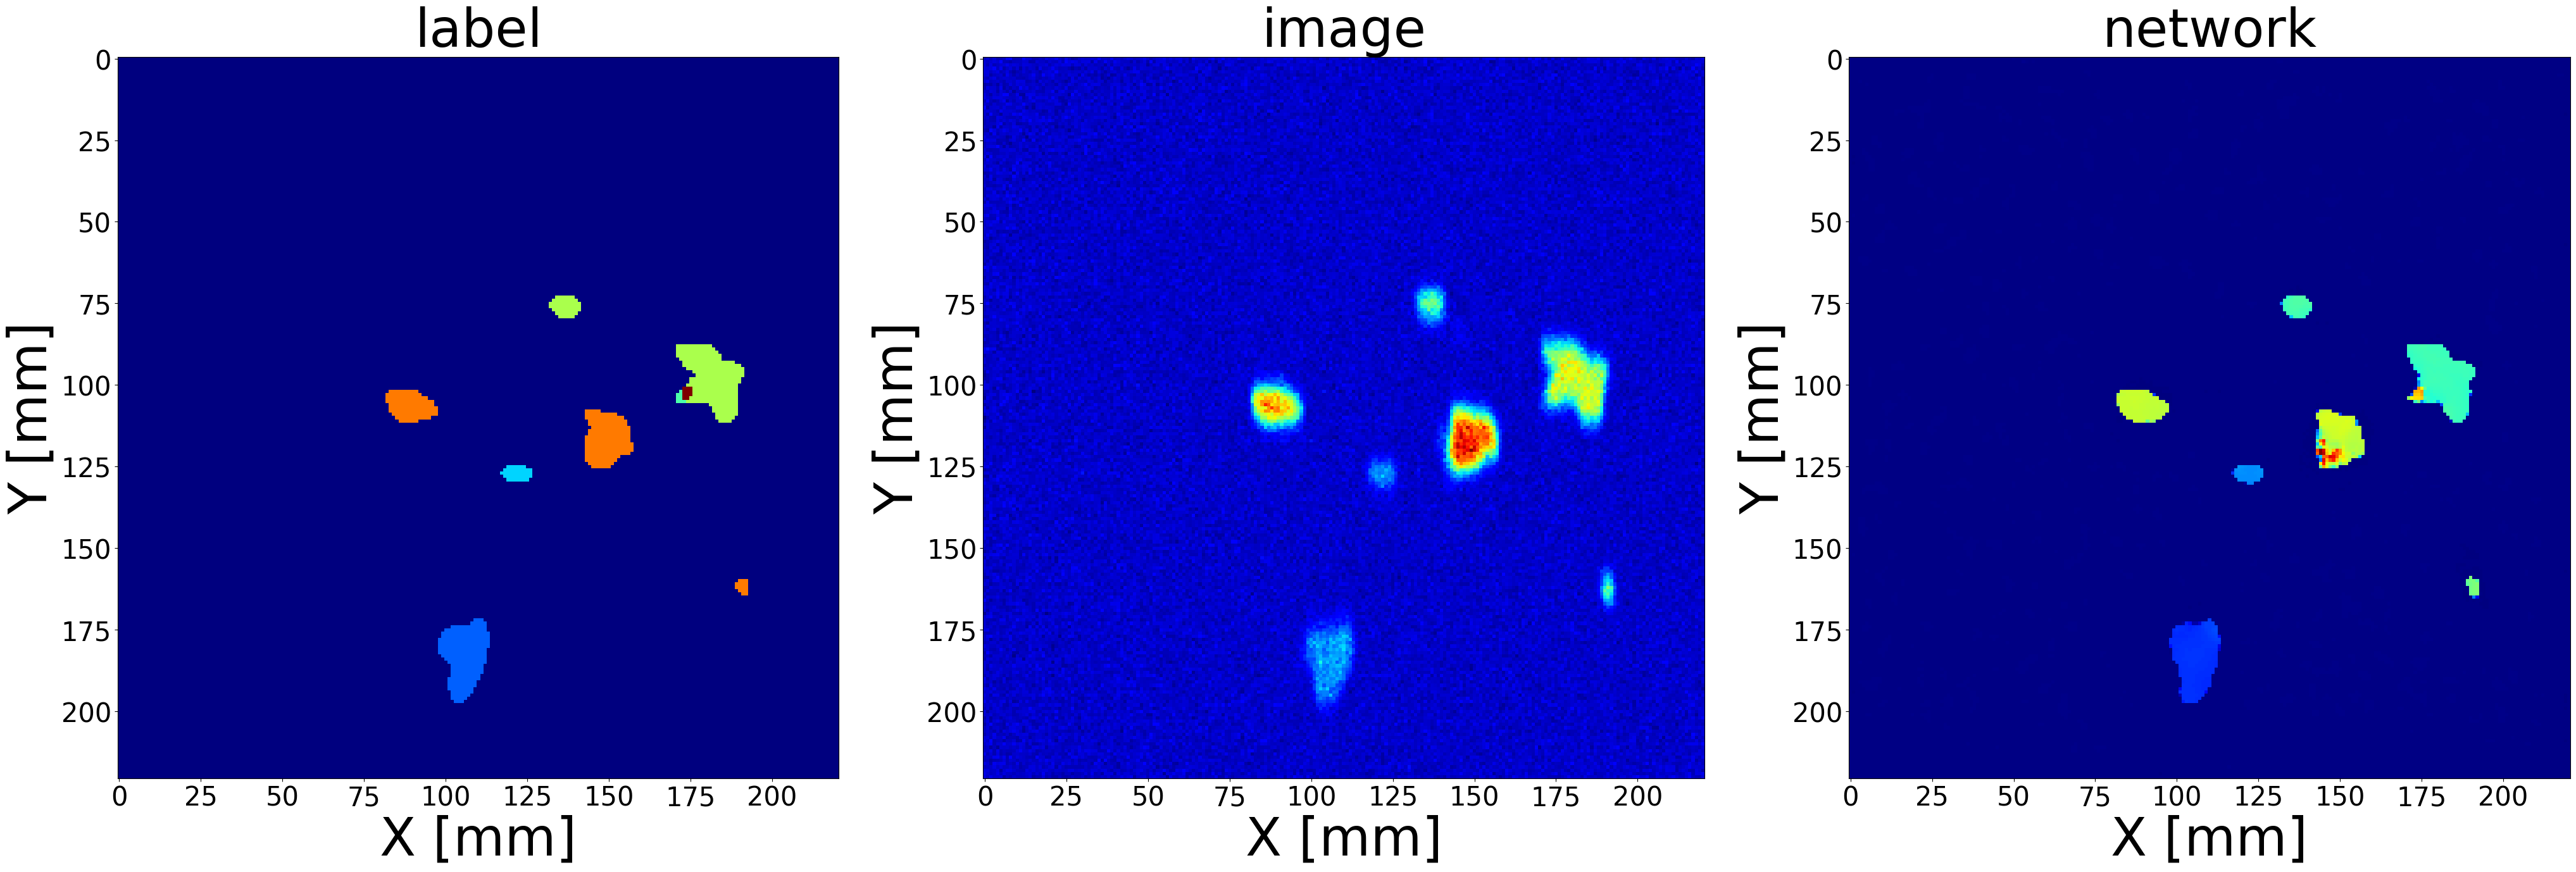

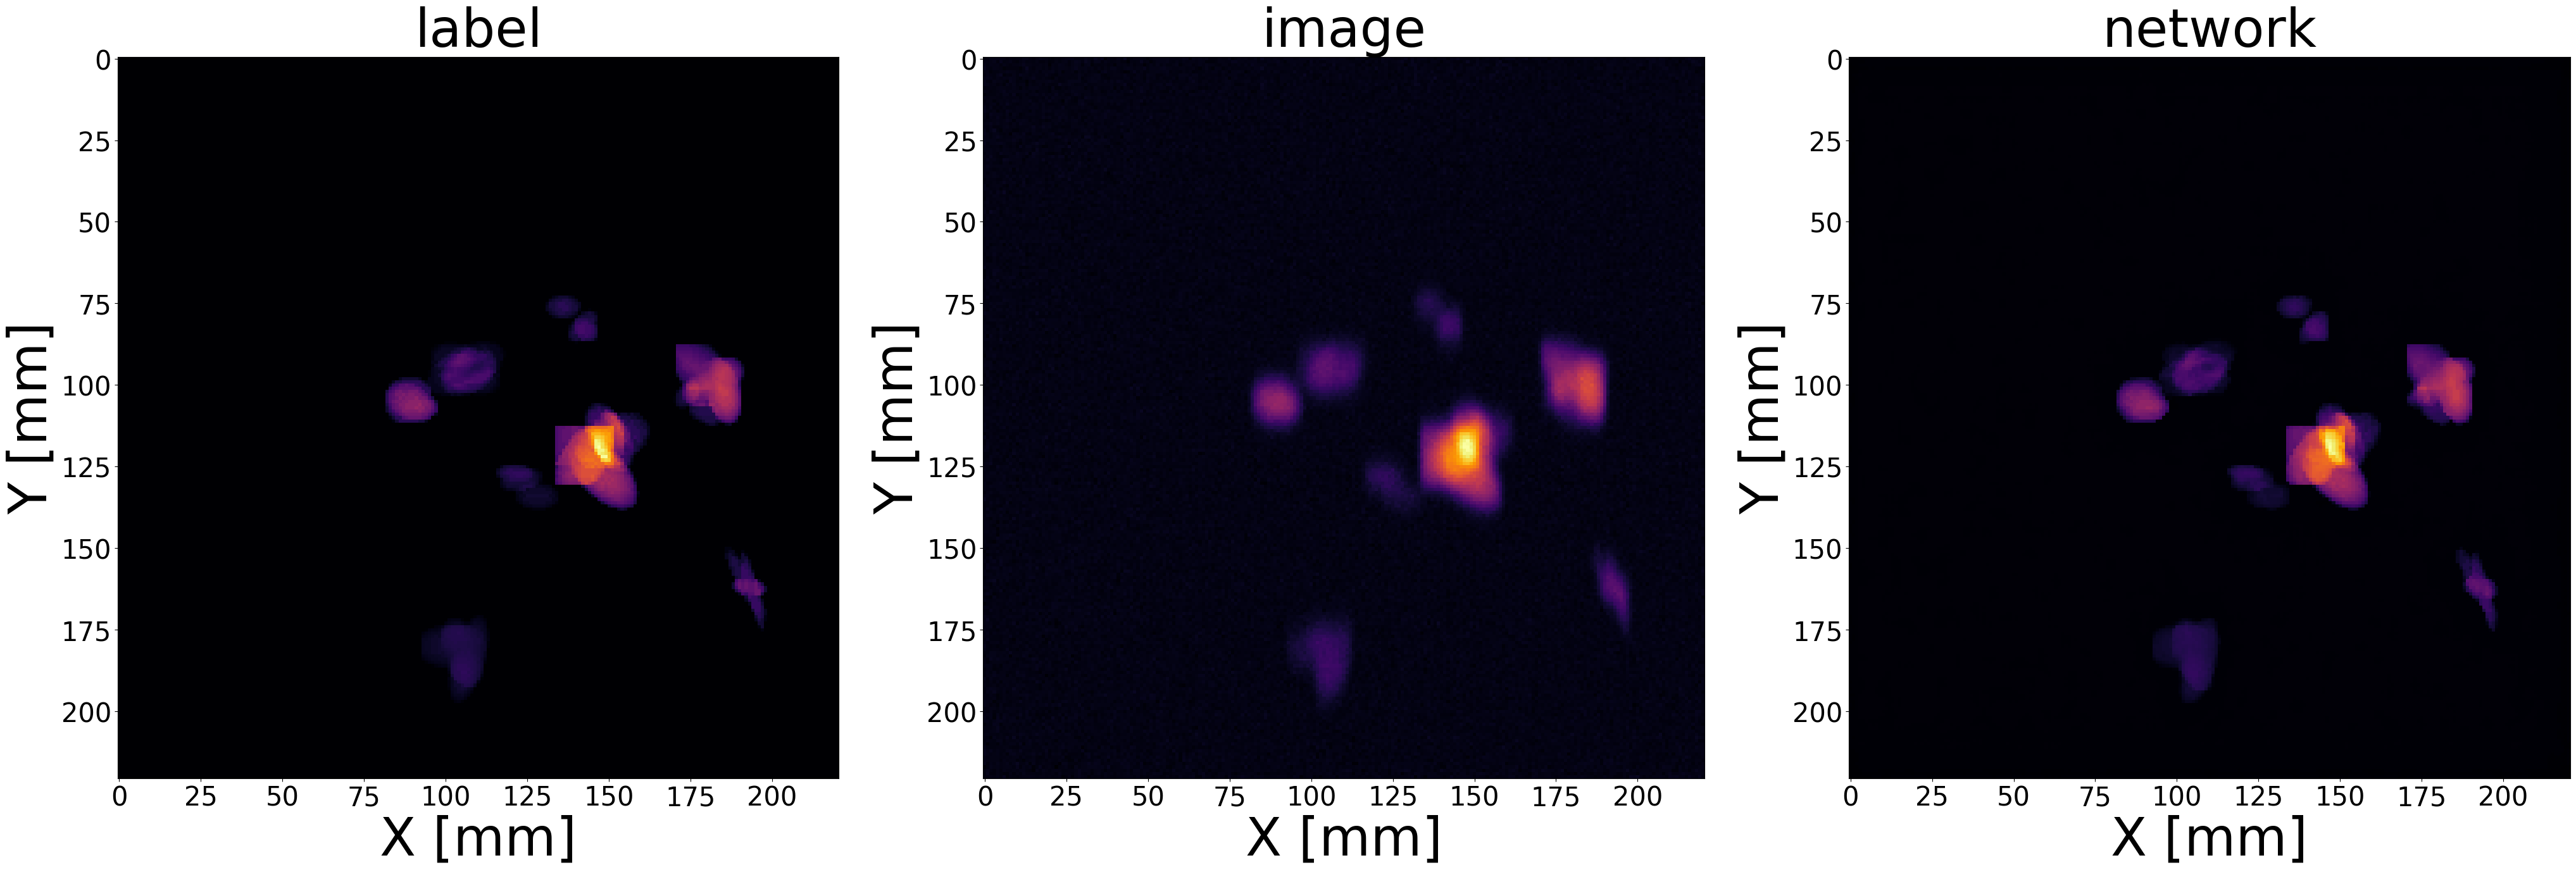

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from matplotlib import pyplot as plt
from skimage.measure import profile_line
from skimage.io import imread
import shutil

import numpy as np
import matplotlib.pyplot as pltp
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

batch_size = 1
torch.cuda.empty_cache()

kernel_path = "/content/gdrive/MyDrive/EvalTest/"

valid_dataset = Data_Loader("/content/gdrive/MyDrive/EvalTest/")
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
                                               batch_size=1,
                                               shuffle=False)
model.load_state_dict(torch.load('/content/gdrive/MyDrive/EvalTest/Asymmetric_Complex_Train_HotBcg_Noise_file2250', map_location=device))
model.to(device)
model.eval()

label_for = np.fromfile("/content/gdrive/MyDrive/EvalTest/label/4.i" ,dtype='float32')
label = np.reshape(label_for, (101, 221, 221))

image_for = np.fromfile("/content/gdrive/MyDrive/EvalTest/image_noise/4.i" ,dtype='float32')
image = np.reshape(image_for, (101, 221, 221))

#image_tensor = image_tensor.reshape(batch_size, 1, 101, 221, 221)
image_tensor = np_to_torch(image).to(device)
#image_tensor = np_to_torch(image)
image_tensor = image_tensor.reshape(1, 1, 101, 221, 221)
pred = model(image_tensor)

net_image_numpy = torch_to_np(pred)
net_image_numpy.astype(np.float32).tofile('/content/gdrive/MyDrive/EvalTest/output_noise/4.i')


fig, ax = plt.subplots(1, 3, figsize=(50, 20)) #Create the figures
ax[0].imshow(label[50,:,:], cmap='jet')
ax[0].set_title('label', fontsize=60)
ax[0].set_xlabel('X [mm]', fontsize=60)
ax[0].set_ylabel('Y [mm]', fontsize=60)
ax[0].xaxis.set_tick_params(labelsize=30)
ax[0].yaxis.set_tick_params(labelsize=30)

ax[1].imshow(image[50,:,:], cmap='jet')
ax[1].set_title('image', fontsize=60)
ax[1].set_xlabel('X [mm]', fontsize=60)
ax[1].set_ylabel('Y [mm]', fontsize=60)
ax[1].xaxis.set_tick_params(labelsize=30)
ax[1].yaxis.set_tick_params(labelsize=30)


ax[2].imshow(net_image_numpy[50,:,:], cmap='jet')
ax[2].set_title('network', fontsize=60)
ax[2].set_xlabel('X [mm]', fontsize=60)
ax[2].set_ylabel('Y [mm]', fontsize=60)
ax[2].xaxis.set_tick_params(labelsize=30)
ax[2].yaxis.set_tick_params(labelsize=30)


fig, ax = plt.subplots(1, 3, figsize=(50, 20)) #Create the figures
ax[0].imshow(np.sum(label,axis=0), cmap='inferno')
ax[0].set_title('label', fontsize=60)
ax[0].set_xlabel('X [mm]', fontsize=60)
ax[0].set_ylabel('Y [mm]', fontsize=60)
ax[0].xaxis.set_tick_params(labelsize=30)
ax[0].yaxis.set_tick_params(labelsize=30)

ax[1].imshow(np.sum(image,axis=0), cmap='inferno')
ax[1].set_title('image', fontsize=60)
ax[1].set_xlabel('X [mm]', fontsize=60)
ax[1].set_ylabel('Y [mm]', fontsize=60)
ax[1].xaxis.set_tick_params(labelsize=30)
ax[1].yaxis.set_tick_params(labelsize=30)

ax[2].imshow(np.sum(net_image_numpy,axis=0), cmap='inferno')
ax[2].set_title('network', fontsize=60)
ax[2].set_xlabel('X [mm]', fontsize=60)
ax[2].set_ylabel('Y [mm]', fontsize=60)
ax[2].xaxis.set_tick_params(labelsize=30)
ax[2].yaxis.set_tick_params(labelsize=30)


EVALUATION NOISE

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


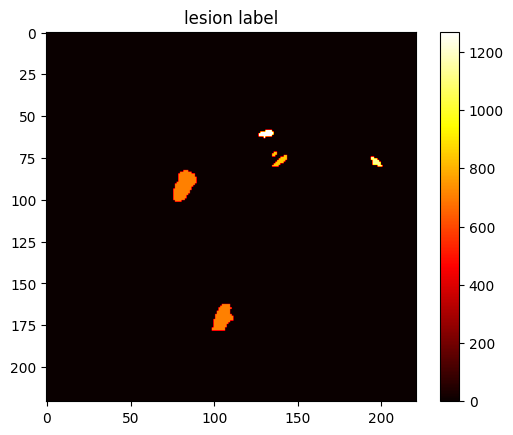

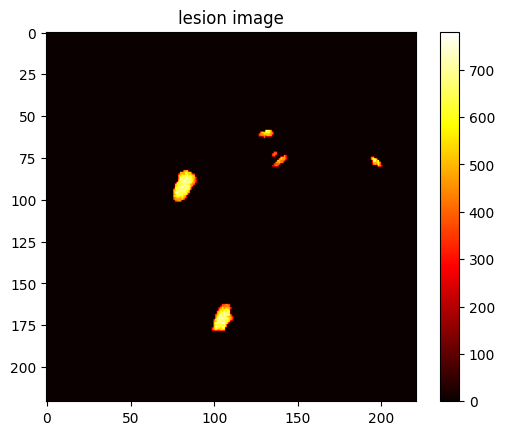

Voxels # 31260
Mean Lesion Bias (Label) 0.0
Mean Lesion Bias (Image) 187.35287907869483
Mean Lesion Bias (Network) 34.566947570429804
Mean Lesion (Label) 5.398909697075234
Mean Lesion (Image) 4.211656291855102
Mean Lesion (Network) 5.179859280487718
Std Lesion (Label) 71.08936610589485
Std Lesion (Image) 56.13548206216712
Std Lesion (Network) 68.65375636621626


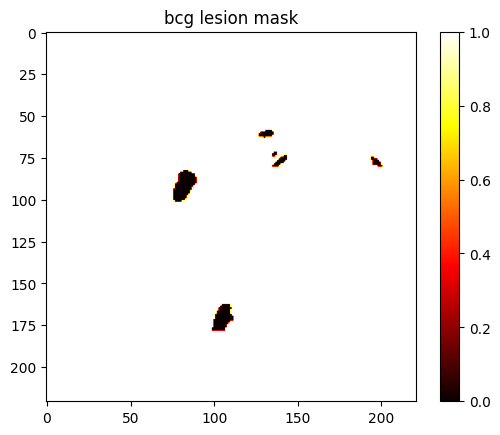

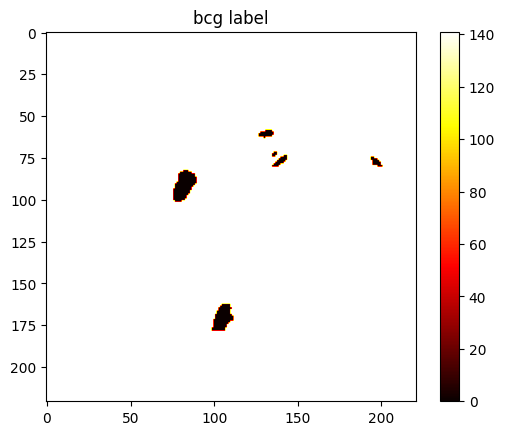

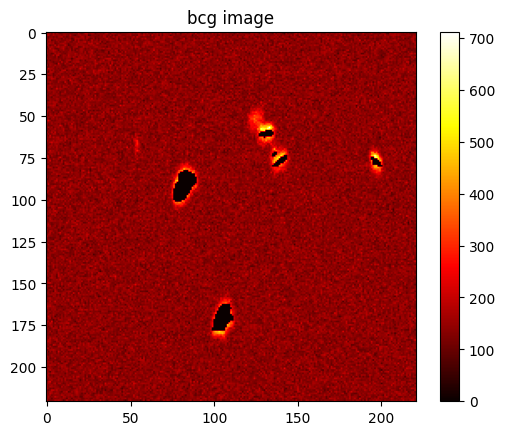

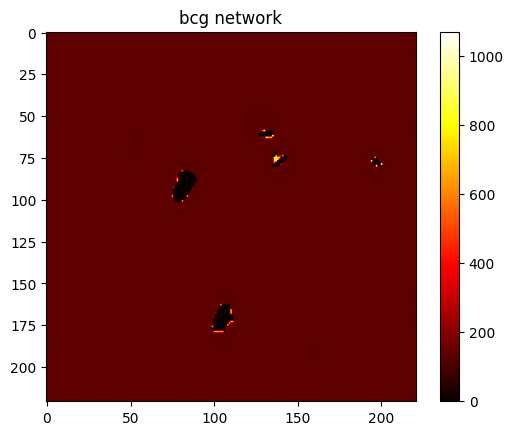

Mean Bcg (Label) 140.1064843467619
Mean Bcg (Image) 141.2876805135111
Mean Bcg (Network) 136.02723821451076
Std Bcg (Label) 11.188714710992903
Std Bcg (Image) 31.396422280406487
Std Bcg (Network) 16.257886612236945
CRC(Label) 1.0
CRC(Image) 1.0090749446256477
CRC(Network) 1.0004729835117991
IR(Label) 0.07985865010573648
IR(Image) 0.22221627650971382
IR(Network) 0.11951934646058725


In [ ]:
import numpy as np
import matplotlib.pyplot as pltp
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from google.colab import drive
drive.mount('/content/gdrive/')
from matplotlib import pyplot as plt

lesion_label = np.zeros(shape = (101,221,221))
lesion_image_noise = np.zeros(shape = (101,221,221))
lesion_network_noise = np.zeros(shape = (101,221,221))

label = np.fromfile("/content/gdrive/MyDrive/EvalTest/label/0.i" ,dtype='float32')
image_noise = np.fromfile("/content/gdrive/MyDrive/EvalTest/image_noise/0.i" ,dtype='float32')
label_mask = np.fromfile("/content/gdrive/MyDrive/EvalTest/label_mask/0.i" ,dtype='float32')
network_noise = np.fromfile("/content/gdrive/MyDrive/EvalTest/output_noise/0.i" ,dtype='float32')

label = np.reshape(label, (101, 221, 221))
image_noise = np.reshape(image_noise, (101, 221, 221))
network_noise = np.reshape(network_noise, (101, 221, 221))
label_mask = np.reshape(label_mask, (101, 221, 221))


for i in range(101):
  for j in range(221):
    for k in range(221):
      lesion_label[i,j,k] = label[i,j,k]*label_mask[i,j,k]
      lesion_image_noise[i,j,k] = image_noise[i,j,k]*label_mask[i,j,k]
      lesion_network_noise[i,j,k] = network_noise[i,j,k]*label_mask[i,j,k]

plt.imshow(lesion_label[50,:,:], cmap='hot')
plt.colorbar()
plt.title("lesion label")
plt.show()
count = np.sum(lesion_label > 0)


plt.imshow(lesion_image_noise[50,:,:], cmap='hot')
plt.colorbar()
plt.title("lesion image")
plt.show()


print("Voxels #",count)

### ------ NO NOISE -------  ###
#BIAS

bias_sum_label = 0.
for i in range(101):
  for j in range(221):
    for k in range(221):
      bias_label = lesion_label[i,j,k] - lesion_label[i,j,k]
      bias_sum_label = bias_sum_label + bias_label
bias_sum_mean_label = bias_sum_label/count

print("Mean Lesion Bias (Label)",bias_sum_mean_label)


bias_sum_image = 0.
for i in range(101):
  for j in range(221):
    for k in range(221):
      bias_image = lesion_label[i,j,k] - lesion_image_noise[i,j,k]
      bias_sum_image = bias_sum_image + bias_image
bias_sum_mean_image = bias_sum_image/count

print("Mean Lesion Bias (Image)",bias_sum_mean_image)

bias_sum_network = 0.
for i in range(101):
  for j in range(221):
    for k in range(221):
      bias_network = lesion_label[i,j,k] - lesion_network_noise[i,j,k]
      bias_sum_network = bias_sum_network + bias_network
bias_sum_mean_network = bias_sum_network/count

print("Mean Lesion Bias (Network)",bias_sum_mean_network)



print("Mean Lesion (Label)",np.mean(lesion_label))
print("Mean Lesion (Image)",np.mean(lesion_image_noise))
print("Mean Lesion (Network)",np.mean(lesion_network_noise))

MeanLesion_l = np.mean(lesion_label)
MeanLesion_i = np.mean(lesion_image_noise)
MeanLesion_n = np.mean(lesion_network_noise)

print("Std Lesion (Label)",np.std(lesion_label))
print("Std Lesion (Image)",np.std(lesion_image_noise))
print("Std Lesion (Network)",np.std(lesion_network_noise))

StdLesion_l = np.std(lesion_label)
StdLesion_i = np.std(lesion_image_noise)
StdLesion_n = np.std(lesion_network_noise)

bcg_label_mask = np.zeros(shape = (101,221,221))
for i in range(101):
  for j in range(221):
    for k in range(221):
      if lesion_label[i,j,k] < 1:
        bcg_label_mask[i,j,k] = 1

plt.imshow(bcg_label_mask[50,:,:], cmap='hot')
plt.colorbar()
plt.title("bcg lesion mask")
plt.show()

bcg_label = np.zeros(shape = (101,221,221))
bcg_image_noise = np.zeros(shape = (101,221,221))
bcg_network_noise = np.zeros(shape = (101,221,221))

for i in range(101):
  for j in range(221):
    for k in range(221):
      bcg_label[i,j,k] = label[i,j,k]*bcg_label_mask[i,j,k]
      bcg_image_noise[i,j,k] = image_noise[i,j,k]*bcg_label_mask[i,j,k]
      bcg_network_noise[i,j,k] = network_noise[i,j,k]*bcg_label_mask[i,j,k]

plt.imshow(bcg_label[50,:,:], cmap='hot')
plt.colorbar()
plt.title("bcg label")
plt.show()

count_bcg = np.sum(bcg_label > 0)
plt.imshow(bcg_image_noise[50,:,:], cmap='hot')
plt.colorbar()
plt.title("bcg image")
plt.show()

plt.imshow(bcg_network_noise[50,:,:], cmap='hot')
plt.colorbar()
plt.title("bcg network")
plt.show()

print("Mean Bcg (Label)",np.mean(bcg_label))
print("Mean Bcg (Image)",np.mean(bcg_image_noise))
print("Mean Bcg (Network)",np.mean(bcg_network_noise))

MeanBcg_l = np.mean(bcg_label)
MeanBcg_i = np.mean(bcg_image_noise)
MeanBcg_n = np.mean(bcg_network_noise)

print("Std Bcg (Label)",np.std(bcg_label))
print("Std Bcg (Image)",np.std(bcg_image_noise))
print("Std Bcg (Network)",np.std(bcg_network_noise))

StdBcg_l = np.std(bcg_label)
StdBcg_i = np.std(bcg_image_noise)
StdBcg_n = np.std(bcg_network_noise)

#CRC
label_crc = ((MeanLesion_l - MeanBcg_l)/MeanBcg_l)/((MeanLesion_l - MeanBcg_l)/MeanBcg_l)
image_crc = ((MeanLesion_i - MeanBcg_i)/MeanBcg_i)/((MeanLesion_l - MeanBcg_l)/MeanBcg_l)
network_crc = ((MeanLesion_n - MeanBcg_n)/MeanBcg_n)/((MeanLesion_l - MeanBcg_l)/MeanBcg_l)

print("CRC(Label)",label_crc)
print("CRC(Image)",image_crc)
print("CRC(Network)",network_crc)

#IR
label_ir = StdBcg_l/MeanBcg_l
image_ir = StdBcg_i/MeanBcg_i
network_ir = StdBcg_n/MeanBcg_n

print("IR(Label)",label_ir)
print("IR(Image)",image_ir)
print("IR(Network)",network_ir)
